# importing 

In [47]:
import warnings
#%load_ext cudf.pandas
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
# for Classifcation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, \
    precision_recall_fscore_support,precision_score,recall_score,classification_report
# for Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,\
explained_variance_score, max_error, median_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
#from pycaret.regression import *
from pycaret.classification import *
#from pycaret.clustering import *
from skimpy import skim
from summarytools import dfSummary
import sweetviz as sv
import statsmodels.api as sm
import dovpanda
import missingno as msno



# The dataset you provided appears to be related to breast cancer diagnosis, particularly for tumors, and includes various features derived from digitized images of breast cancer biopsies. Here's an overview of the columns in the dataset:

## id: Unique identifier for each patient.
## diagnosis: The target variable indicating whether the tumor is malignant (M) or benign (B).
## radius_mean: Mean of distances from the center to points on the perimeter.
## texture_mean: Standard deviation of gray-scale values.
## perimeter_mean: Mean size of the core tumor.
## area_mean: Mean area of the tumor.
## smoothness_mean: Mean smoothness of the tumor boundary.
## compactness_mean: Mean compactness (perimeter^2 / area - 1.0).
## concavity_mean: Mean severity of concave portions of the contour.
## concave points_mean: Mean number of concave portions of the contour.
## symmetry_mean: Mean symmetry of the tumor.
## fractal_dimension_mean: Mean "coastline approximation" - 1.
## radius_se: Standard error of the mean of distances from the center to points on the perimeter.
## texture_se: Standard error of gray-scale values.
## perimeter_se: Standard error of the size of the core tumor.
## area_se: Standard error of the area of the tumor.
## smoothness_se: Standard error of the smoothness of the tumor boundary.
## compactness_se: Standard error of the compactness.
## concavity_se: Standard error of the severity of concave portions of the contour.
## concave points_se: Standard error of the number of concave portions of the contour.
## symmetry_se: Standard error of the symmetry of the tumor.
## fractal_dimension_se: Standard error of the "coastline approximation" - 1.
## radius_worst: "Worst" or largest mean value for radius.
## texture_worst: "Worst" or largest mean value for texture.
## perimeter_worst: "Worst" or largest mean value for perimeter.
## area_worst: "Worst" or largest mean value for area.
## smoothness_worst: "Worst" or largest mean value for smoothness.
## compactness_worst: "Worst" or largest mean value for compactness.
## concavity_worst: "Worst" or largest mean value for concavity.
## concave points_worst: "Worst" or largest mean value for concave points.
## symmetry_worst: "Worst" or largest mean value for symmetry.
## fractal_dimension_worst: "Worst" or largest mean value for fractal dimension.

# preprocessing and cleaning


In [8]:
df=pd.read_csv(r"C:\Users\fady\Downloads\Task 2 Breast Cancer Wisconsin (Diagnostic)\data.csv")

In [9]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80    1001.00   
1      842517         M        20.57         17.77          132.90    1326.00   
2    84300903         M        19.69         21.25          130.00    1203.00   
3    84348301         M        11.42         20.38           77.58     386.10   
4    84358402         M        20.29         14.34          135.10    1297.00   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00    1479.00   
565    926682         M        20.13         28.25          131.20    1261.00   
566    926954         M        16.60         28.08          108.30     858.10   
567    927241         M        20.60         29.33          140.10    1265.00   
568     92751         B         7.76         24.54           47.92     181.00   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0               0.12              0.28            0.30                 0.15   
1               0.08              0.08            0.09                 0.07   
2               0.11              0.16            0.20                 0.13   
3               0.14              0.28            0.24                 0.11   
4               0.10              0.13            0.20                 0.10   
..               ...               ...             ...                  ...   
564             0.11              0.12            0.24                 0.14   
565             0.10              0.10            0.14                 0.10   
566             0.08              0.10            0.09                 0.05   
567             0.12              0.28            0.35                 0.15   
568             0.05              0.04            0.00                 0.00   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60     2019.00              0.16   
1    ...          23.41           158.80     1956.00              0.12   
2    ...          25.53           152.50     1709.00              0.14   
3    ...          26.50            98.87      567.70              0.21   
4    ...          16.67           152.20     1575.00              0.14   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10     2027.00              0.14   
565  ...          38.25           155.00     1731.00              0.12   
566  ...          34.12           126.70     1124.00              0.11   
567  ...          39.42           184.60     1821.00              0.17   
568  ...          30.37            59.16      268.60              0.09   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0                 0.67             0.71                  0.27            0.46   
1                 0.19             0.24                  0.19            0.28   
2                 0.42             0.45                  0.24            0.36   
3                 0.87             0.69                  0.26            0.66   
4                 0.20             0.40                  0.16            0.24   
..                 ...              ...                   ...             ...   
564               0.21             0.41                  0.22            0.21   
565               0.19             0.32                  0.16            0.26   
566               0.31             0.34                  0.14            0.22   
567               0.87             0.94                  0.27            0.41   
568               0.06             0.00                  0.00            0.29   

     fractal_dimension_worst  Unnamed: 32  
0                       0.12          NaN  
1                       0.09          NaN  
2                       0.09          NaN  
3                       0.17          NaN  
4      

In [10]:
dfSummary(df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
count       569.00       569.00        569.00          569.00     569.00   
mean   30371831.43        14.13         19.29           91.97     654.89   
std   125020585.61         3.52          4.30           24.30     351.91   
min        8670.00         6.98          9.71           43.79     143.50   
25%      869218.00        11.70         16.17           75.17     420.30   
50%      906024.00        13.37         18.84           86.24     551.10   
75%     8813129.00        15.78         21.80          104.10     782.70   
max   911320502.00        28.11         39.28          188.50    2501.00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count           569.00            569.00          569.00               569.00   
mean              0.10              0.10            0.09                 0.05   
std               0.01              0.05            0.08                 0.04   
min               0.05              0.02            0.00                 0.00   
25%               0.09              0.06            0.03                 0.02   
50%               0.10              0.09            0.06                 0.03   
75%               0.11              0.13            0.13                 0.07   
max               0.16              0.35            0.43                 0.20   

       symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
count         569.00  ...         569.00           569.00      569.00   
mean            0.18  ...          25.68           107.26      880.58   
std             0.03  ...           6.15            33.60      569.36   
min             0.11  ...          12.02            50.41      185.20   
25%             0.16  ...          21.08            84.11      515.30   
50%             0.18  ...          25.41            97.66      686.50   
75%             0.20  ...          29.72           125.40     1084.00   
max             0.30  ...          49.54           251.20     4254.00   

       smoothness_worst  compactness_worst  concavity_worst  \
count            569.00             569.00           569.00   
mean               0.13               0.25             0.27   
std                0.02               0.16             0.21   
min                0.07               0.03             0.00   
25%                0.12               0.15             0.11   
50%                0.13               0.21             0.23   
75%                0.15               0.34             0.38   
max                0.22               1.06             1.25   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count                569.00          569.00                   569.00   
mean                   0.11            0.29                     0.08   
std                    0.07            0.06                     0.02   
min                    0.00            0.16                     0.06   
25%                    0.06            0.25                     0.07   
50%                    0.10            0.28                     0.08   
75%                    0.16            0.32                     0.09   
max                    0.29            0.66                     0.21   

       Unnamed: 32  
count         0.00  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [13]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 569    │ │ float64     │ 31    │                                                          │
│ │ Number of columns │ 33     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name ┃ NA  ┃ NA % ┃ mean     ┃ sd        ┃ p0      ┃ p25    ┃ p50    ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ id          │   0 │    0 │ 30000000 │ 130000000 │    8700 │ 870000 │ 910000 │ 8800000 │ 910000000 │   ▇    │  │
│ │ radius_mean │   0 │    0 │       14 │       3.5 │       7 │     12 │     13 │      16 │        28 │  ▂▇▃▂  │  │
│ │ texture_mea │   0 │    0 │       19 │       4.3 │     9.7 │     16 │     19 │      22 │        39 │  ▂▇▆▂  │  │
│ │ n           │     │      │          │           │         │        │        │         │           │        │  │
│ │ perimeter_m │   0 │    0 │       92 │        24 │      44 │     75 │     86 │     100 │       190 │  ▂▇▃▂  │  │
│ │ ean         │     │      │          │           │         │        │        │         │           │        │  │
│ │ area_mean   │   0 │    0 │      650 │       350 │     140 │    420 │    550 │     780 │      2500 │  ▇▆▂▁  │  │
│ │ smoothness_ │   0 │    0 │    0.096 │     0.014 │   0.053 │  0.086 │  0.096 │    0.11 │      0.16 │   ▅▇▃  │  │
│ │ mean        │     │      │          │           │         │        │        │         │           │        │  │
│ │ compactness │   0 │    0 │      0.1 │     0.053 │   0.019 │  0.065 │  0.093 │    0.13 │      0.35 │  ▇▇▃▁  │  │
│ │ _mean       │     │      │          │           │         │        │        │         │           │        │  │
│ │ concavity_m │   0 │    0 │    0.089 │      0.08 │       0 │   0.03 │  0.062 │    0.13 │      0.43 │  ▇▃▂▁  │  │
│ │ ean         │     │      │          │           │         │        │        │         │           │        │  │
│ │ concave     │   0 │    0 │    0.049 │     0.039 │       0 │   0.02 │  0.034 │   0.074 │       0.2 │  ▇▃▃▁  │  │
│ │ points_mean │     │      │          │           │         │        │        │         │           │        │  │
│ │ symmetry_me │   0 │    0 │     0.18 │     0.027 │    0.11 │   0.16 │   0.18 │     0.2 │       0.3 │ ▁▇▇▂▁  │  │
│ │ an          │     │      │          │           │         │        │        │         │           │        │  │
│ │ fractal_dim │   0 │    0 │    0.063 │    0.0071 │    0.05 │  0.058 │  0.062 │   0.066 │     0.097 │  ▅▇▃▁  │  │
│ │ ension_mean │     │      │          │           │         │        │        │         │           │        │  │
│ │ radius_se   │   0 │    0 │     0.41 │      0.28 │    0.11 │   0.23 │   0.32 │    0.48 │       2.9 │   ▇▁   │  │
│ │ texture_se  │   0 │    0 │      1.2 │      0.55 │    0.36 │   0.83 │    1.1 │     1.5 │       4.9 │  ▇▆▁   │  │
│ │ perimeter_s │   0 │    0 │      2.9 │         2 │   

In [14]:
df.describe(include="object")

diagnosis
count        569
unique         2
top            B
freq         357

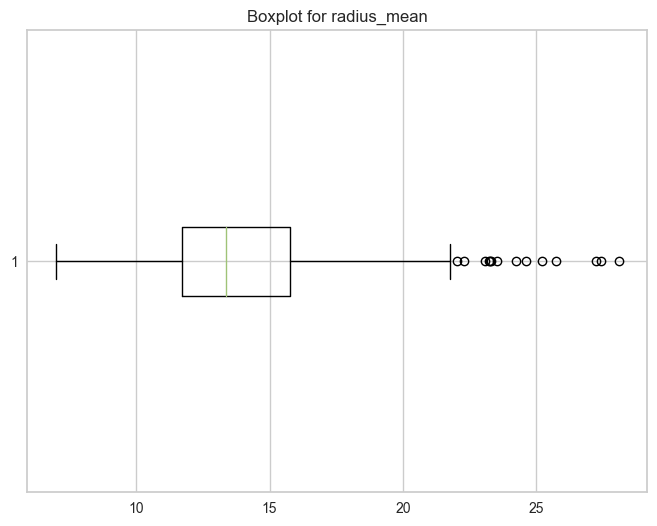

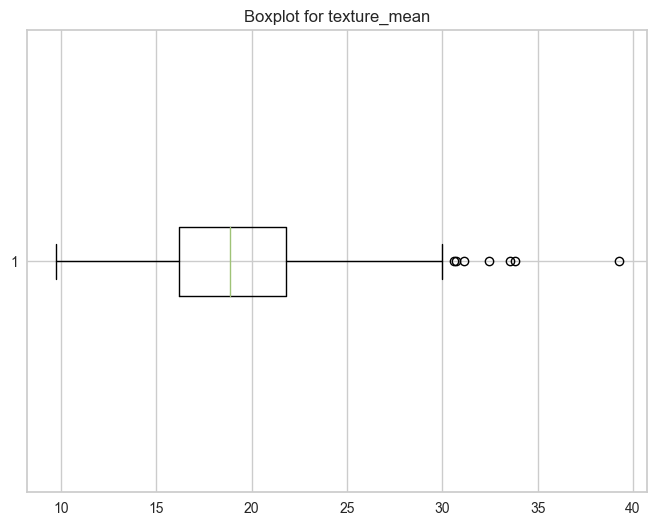

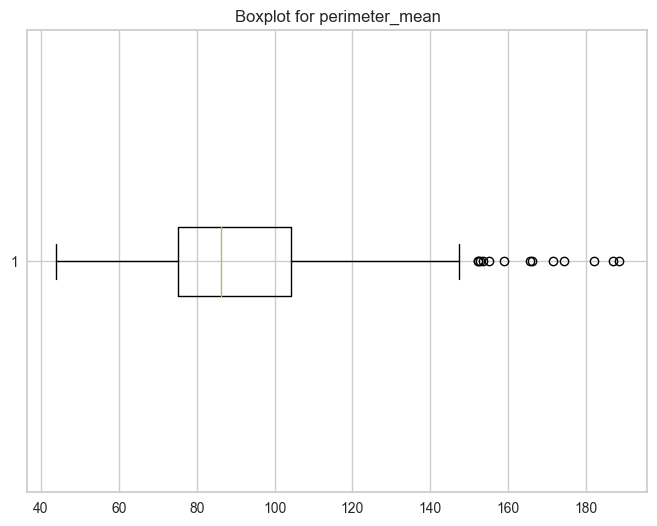

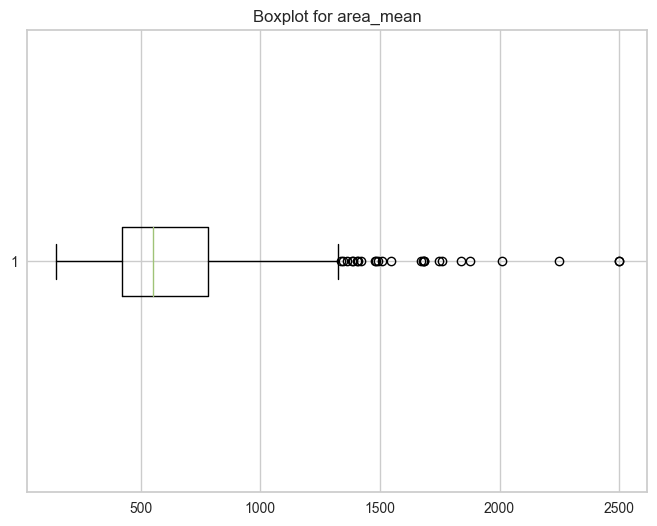

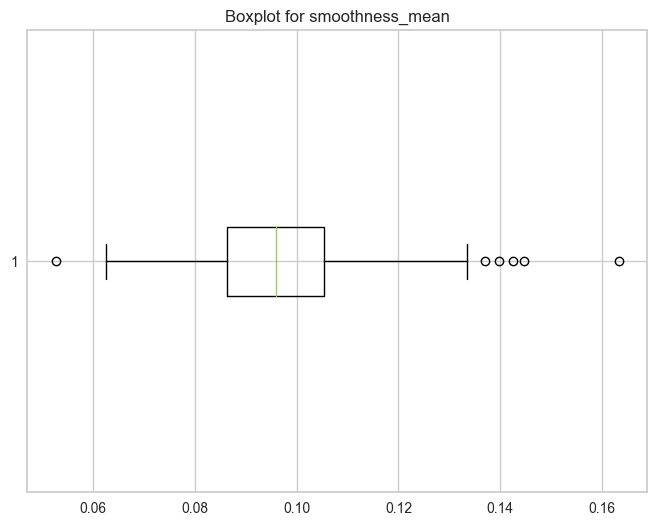

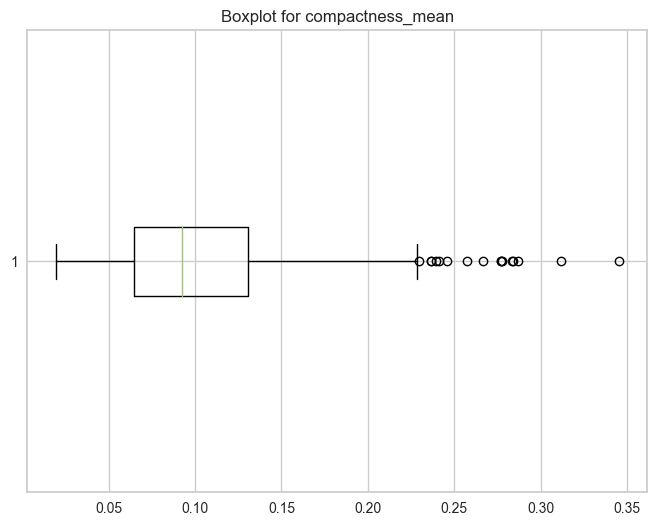

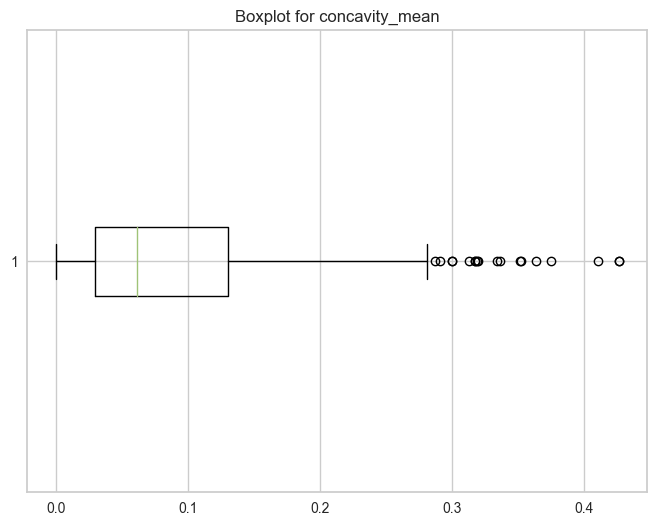

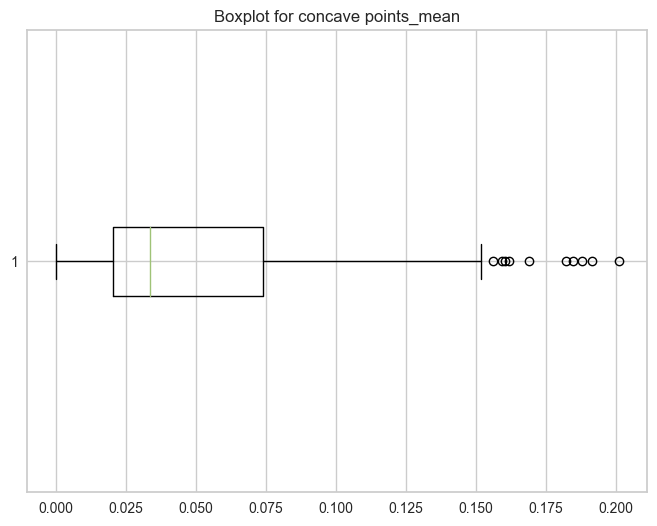

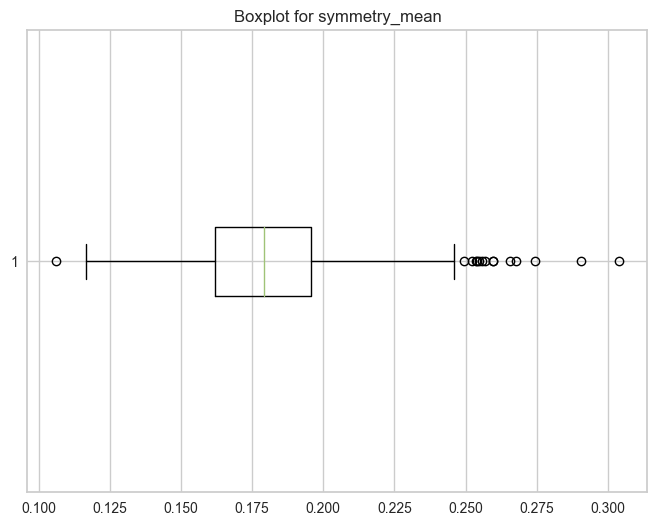

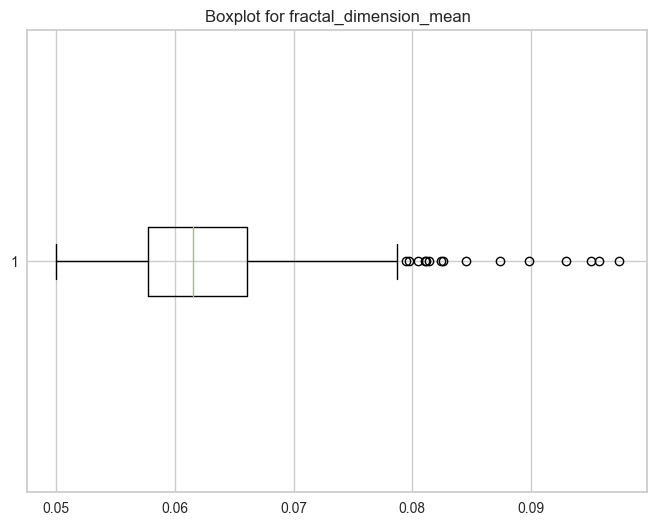

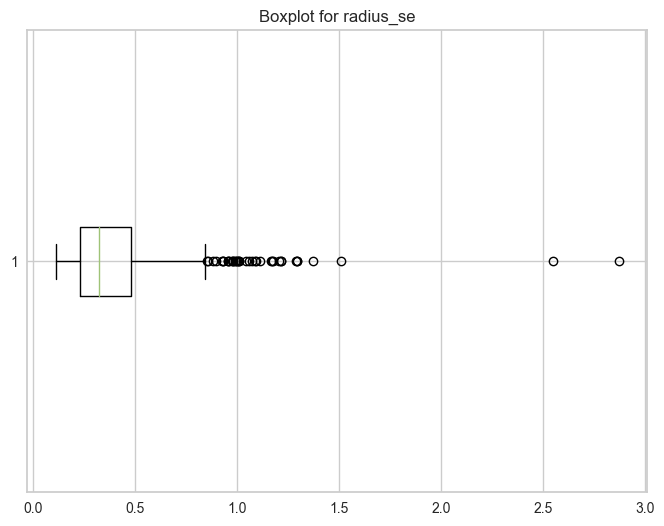

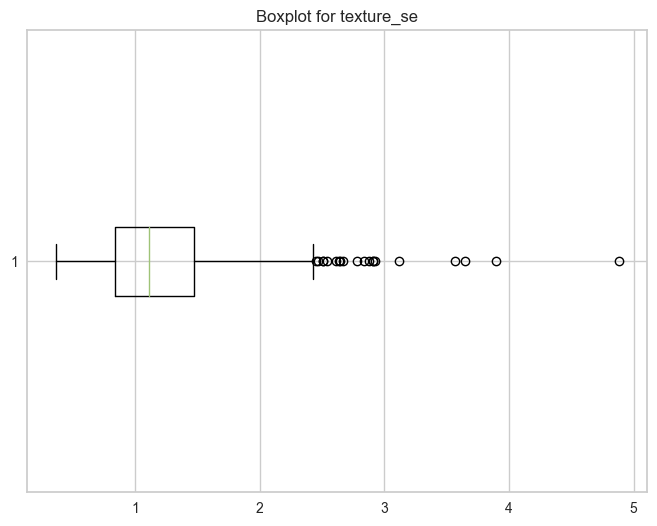

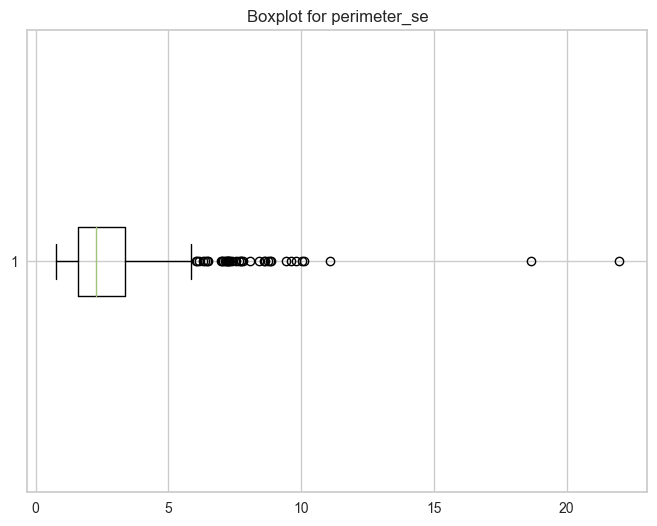

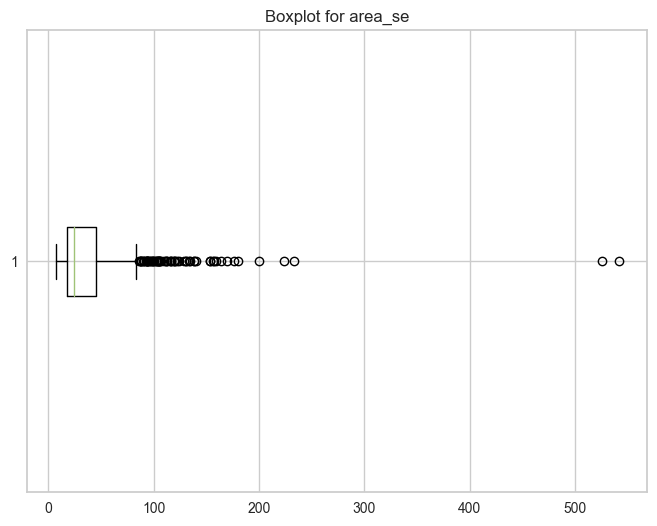

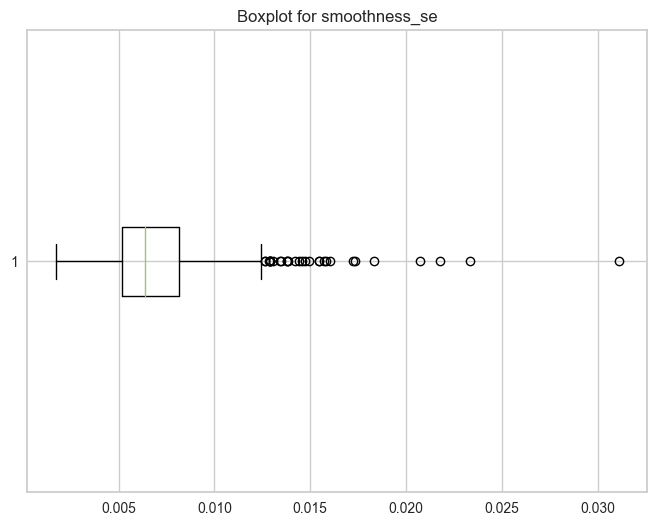

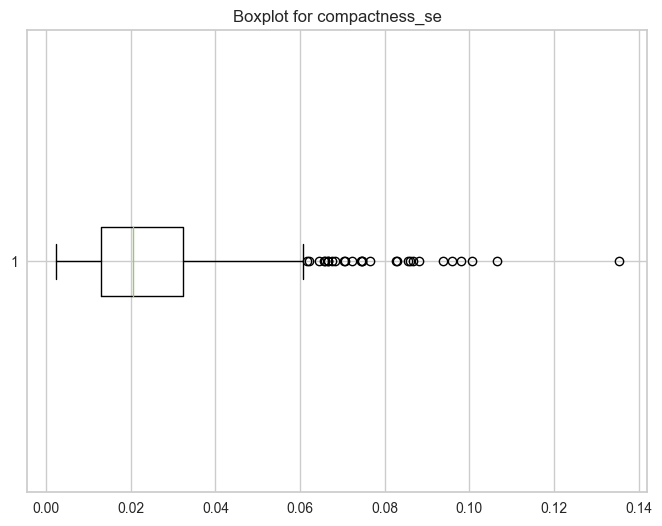

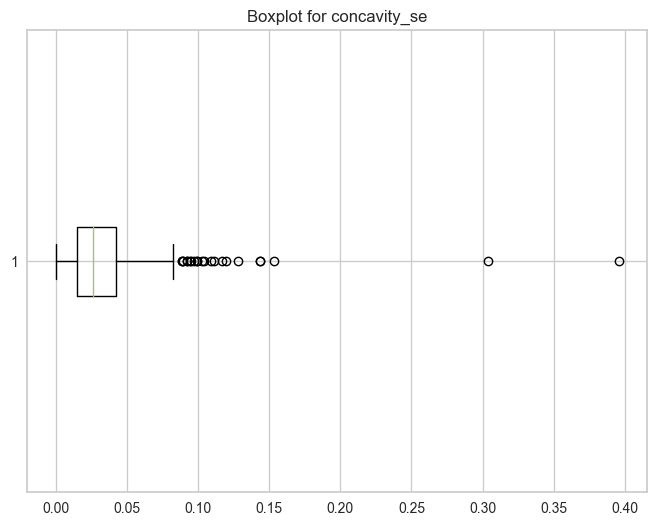

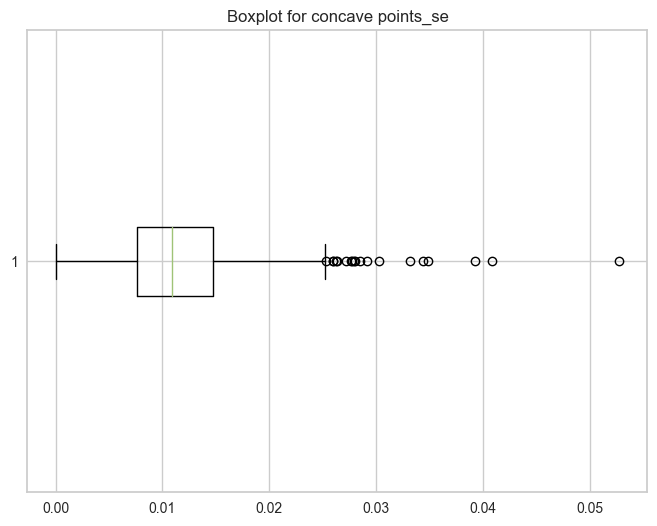

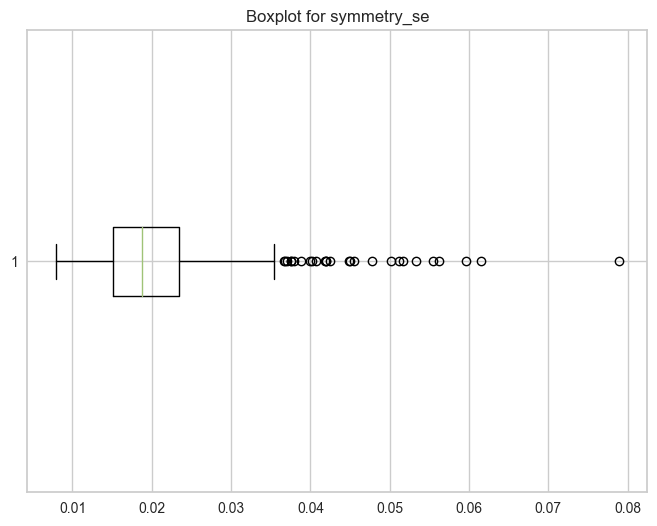

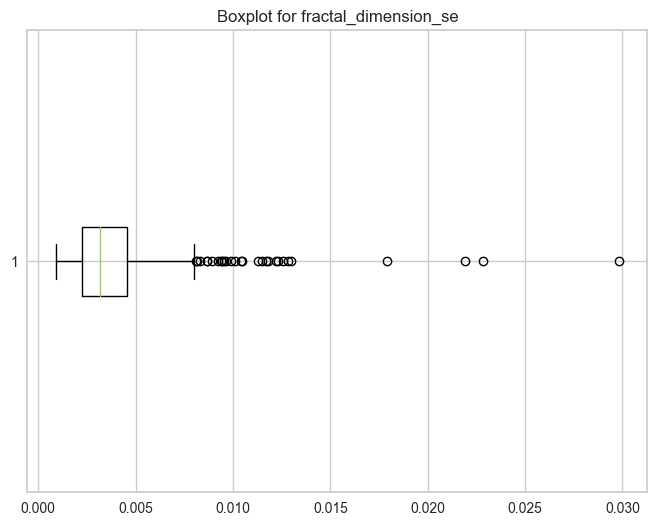

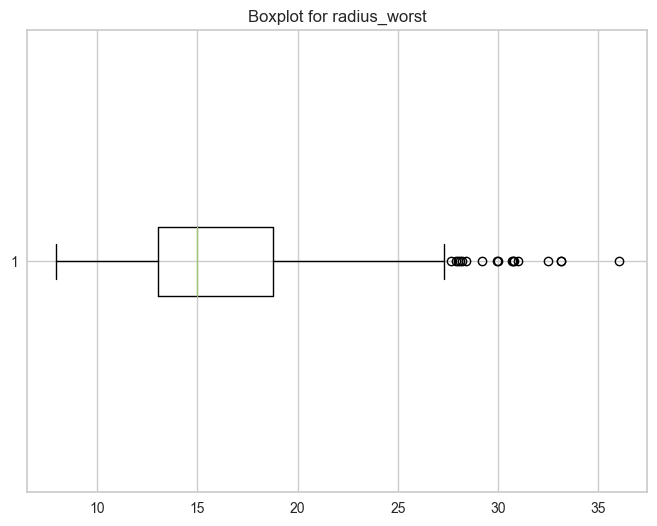

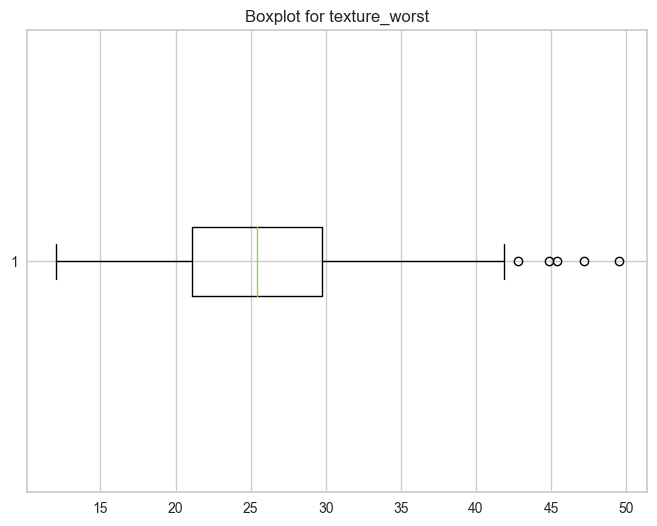

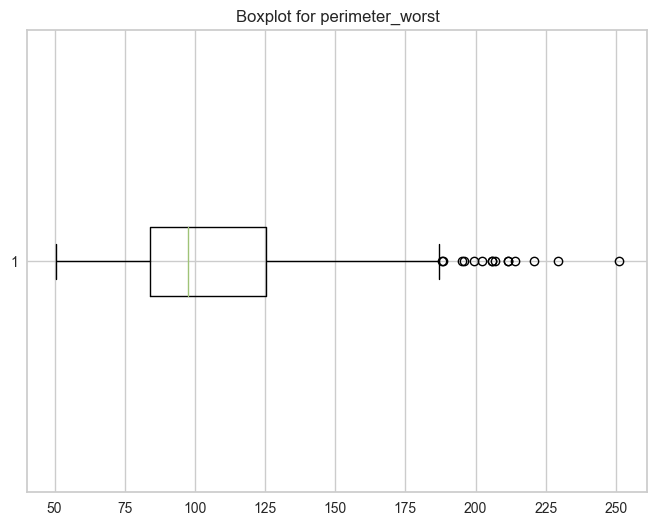

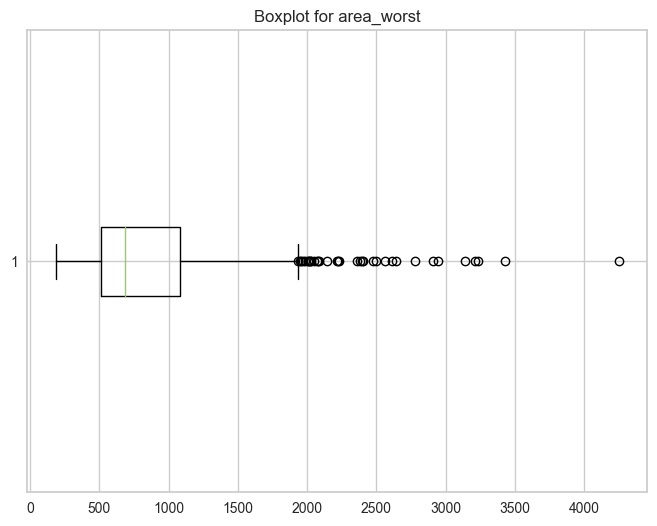

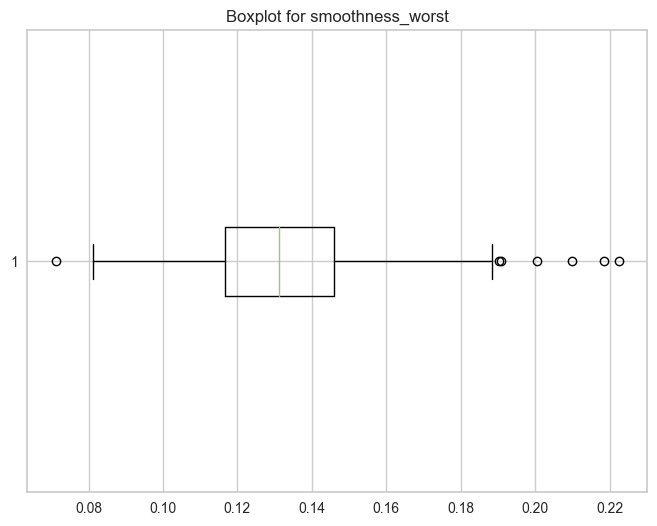

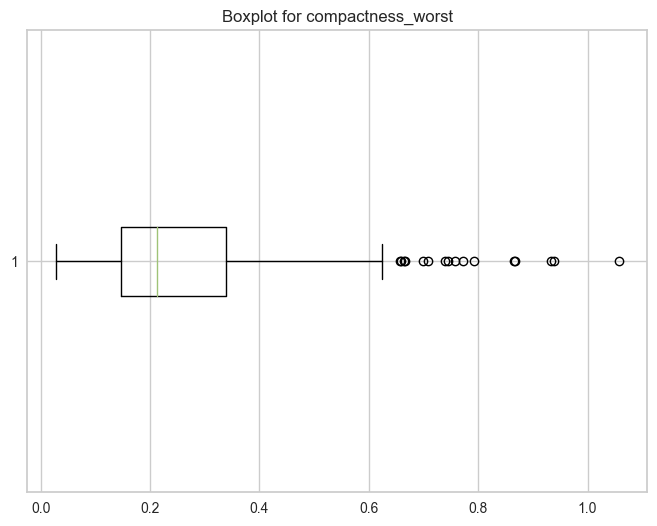

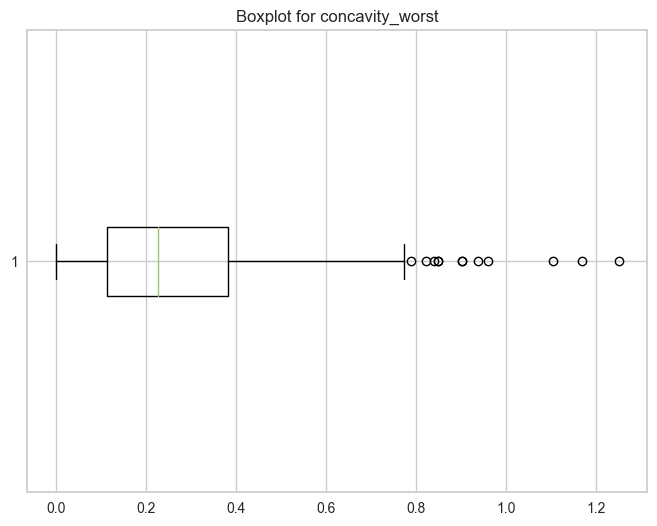

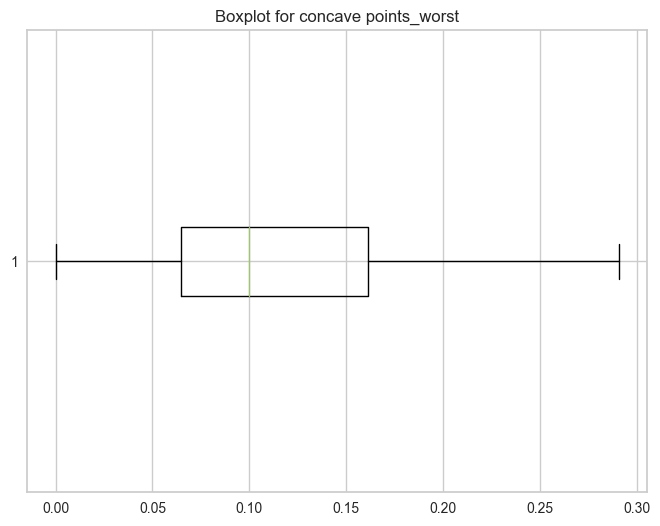

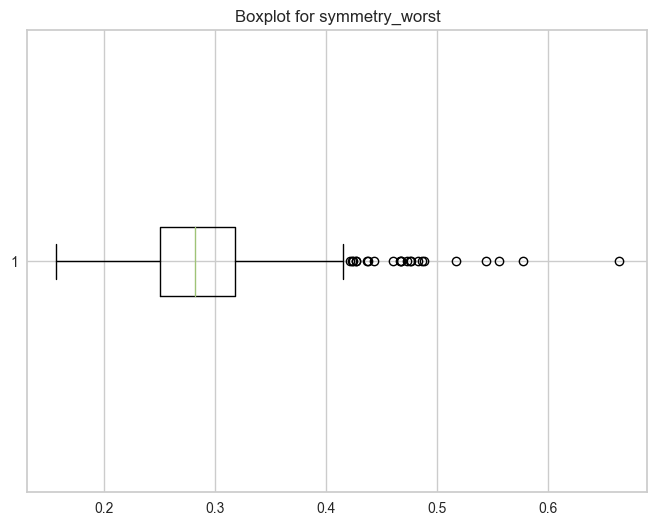

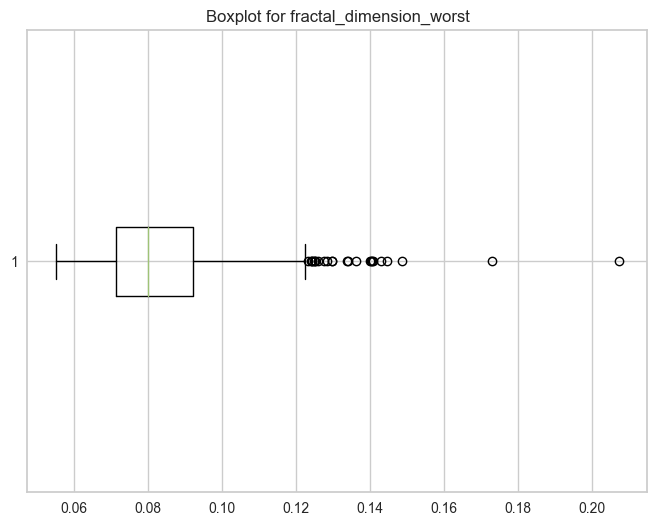

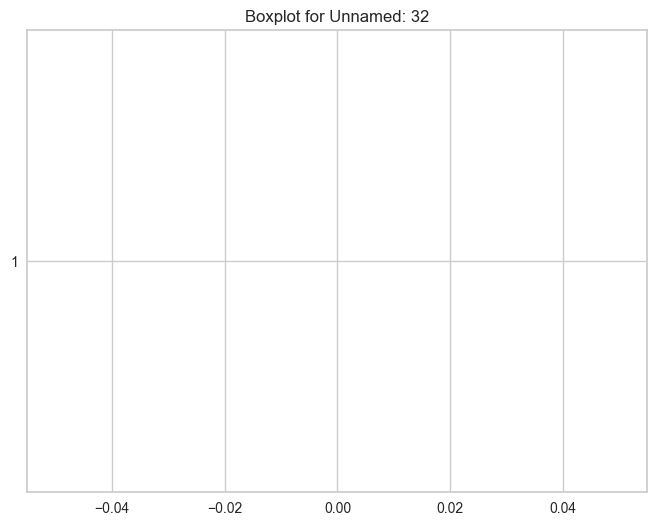

In [19]:
numerical_columns = df.select_dtypes(include=['float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column], vert=False)
    plt.title(f'Boxplot for {column}')
    plt.show()

In [20]:
df = df.drop('Unnamed: 32', axis=1)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80    1001.00   
1    842517          1        20.57         17.77          132.90    1326.00   
2  84300903          1        19.69         21.25          130.00    1203.00   
3  84348301          1        11.42         20.38           77.58     386.10   
4  84358402          1        20.29         14.34          135.10    1297.00   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0             0.12              0.28            0.30                 0.15   
1             0.08              0.08            0.09                 0.07   
2             0.11              0.16            0.20                 0.13   
3             0.14              0.28            0.24                 0.11   
4             0.10              0.13            0.20                 0.10   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60     2019.00   
1  ...         24.99          23.41           158.80     1956.00   
2  ...         23.57          25.53           152.50     1709.00   
3  ...         14.91          26.50            98.87      567.70   
4  ...         22.54          16.67           152.20     1575.00   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0              0.16               0.67             0.71                  0.27   
1              0.12               0.19             0.24                  0.19   
2              0.14               0.42             0.45                  0.24   
3              0.21               0.87             0.69                  0.26   
4              0.14               0.20             0.40                  0.16   

   symmetry_worst  fractal_dimension_worst  
0            0.46                     0.12  
1            0.28                     0.09  
2            0.36                     0.09  
3            0.66                     0.17  
4            0.24                     0.08  

[5 rows x 32 columns]

# visualization

                                             |                                             | [  0%]   00:00 ->…


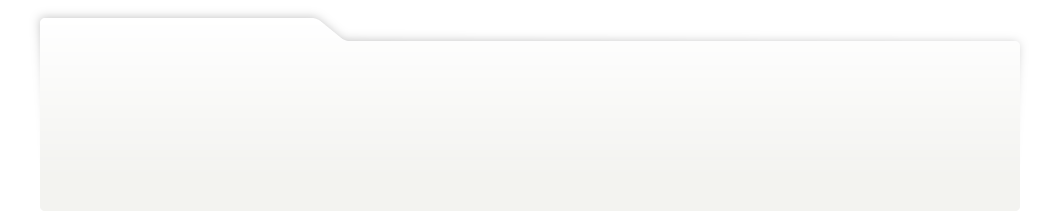
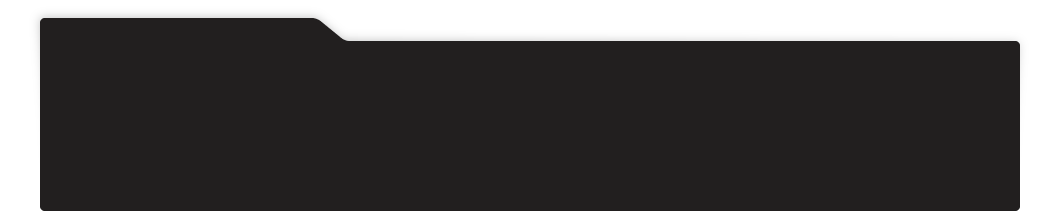
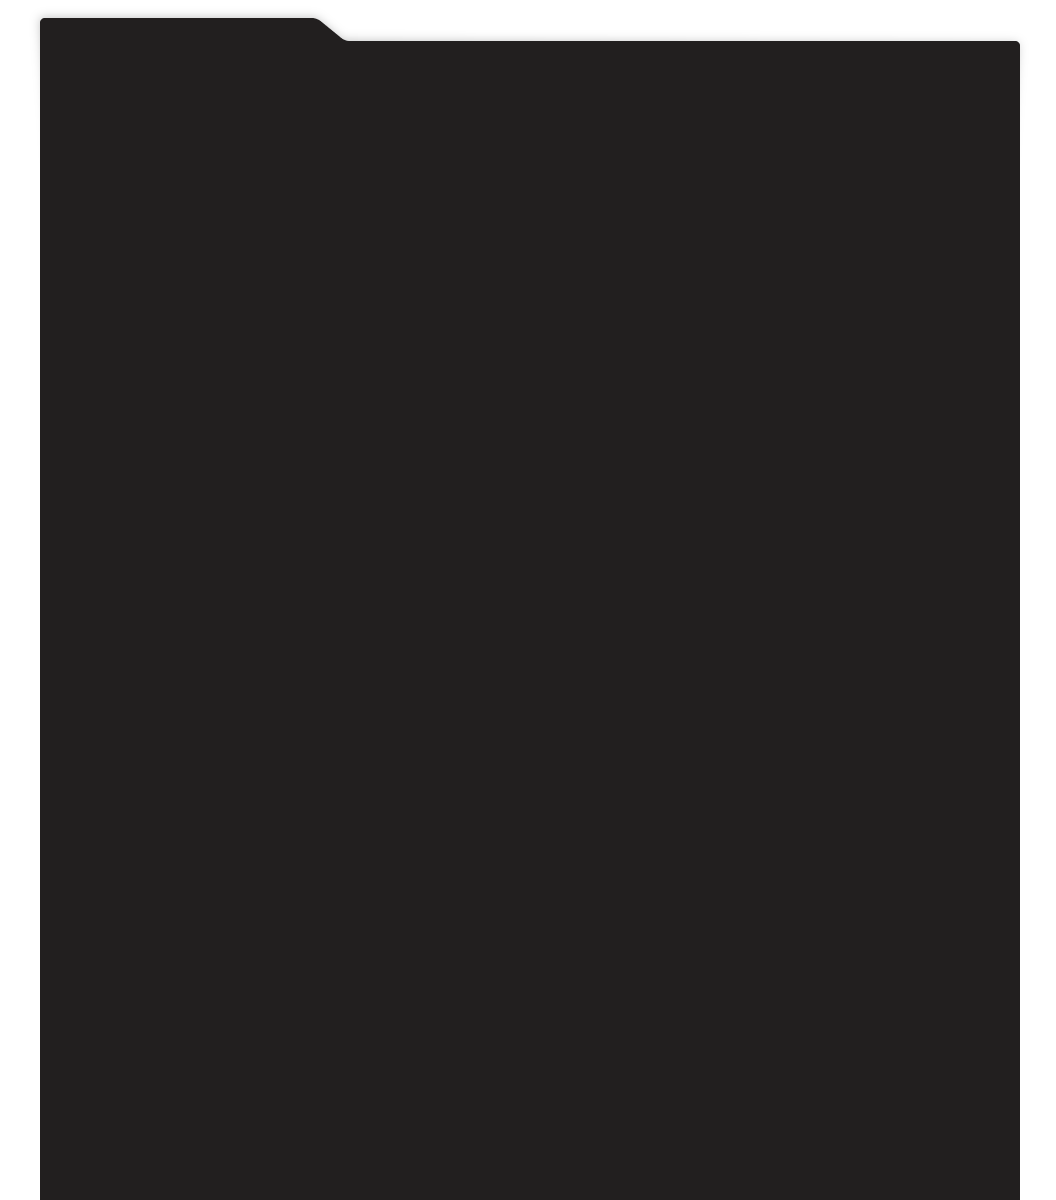
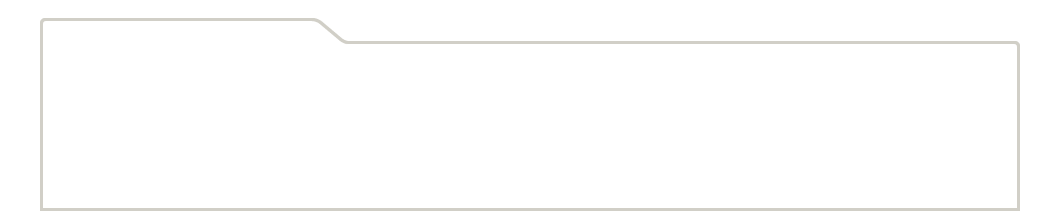
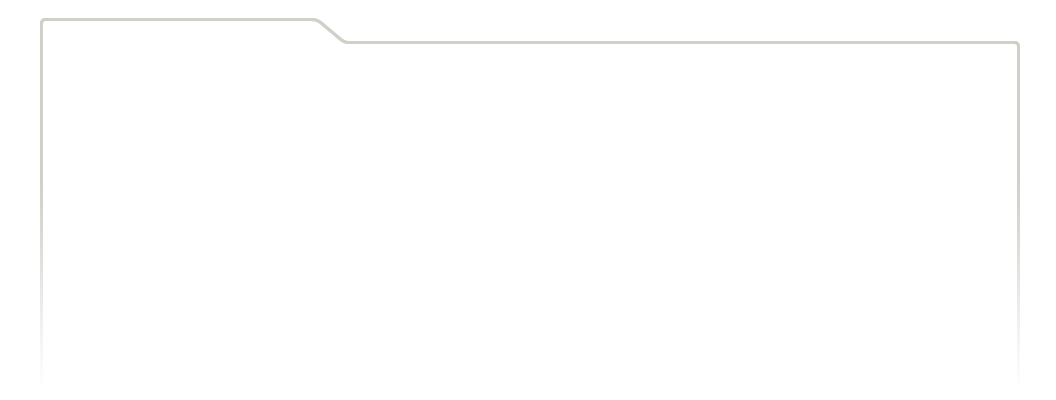
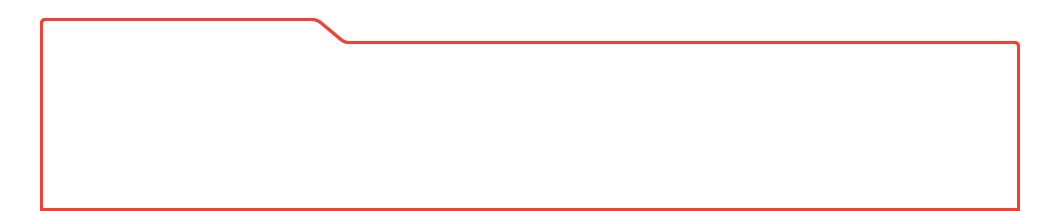
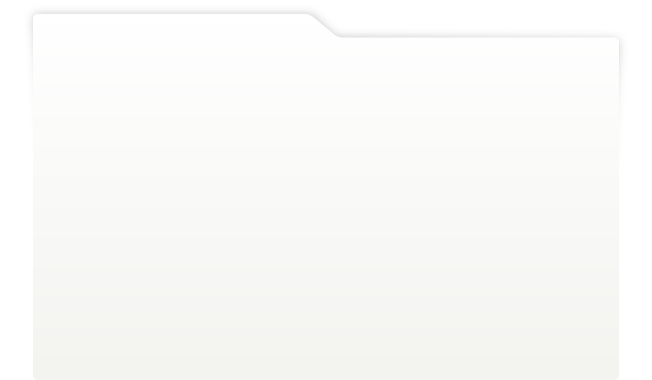
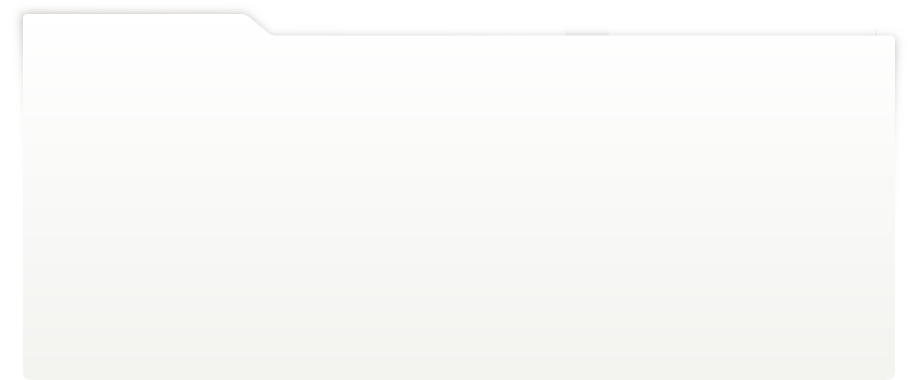
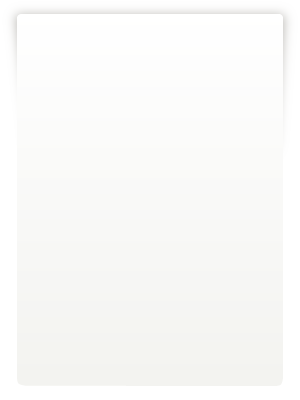
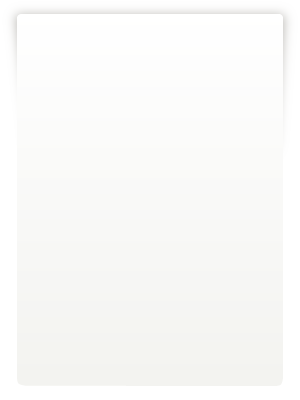
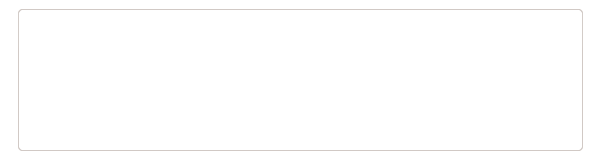
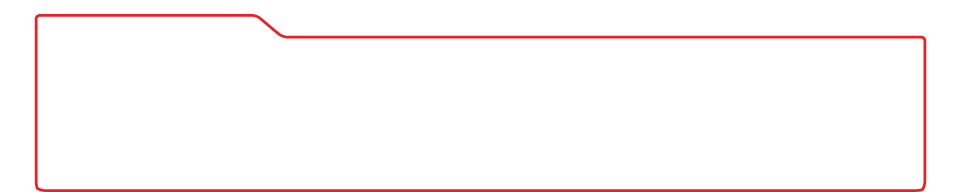
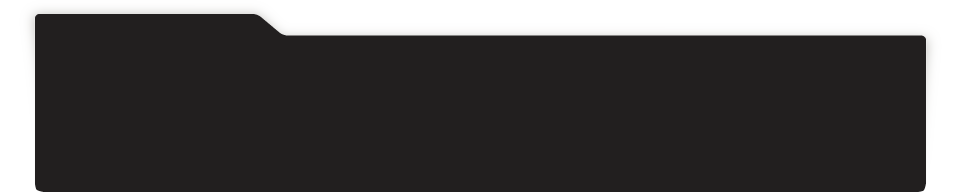
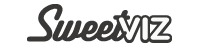
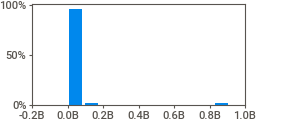
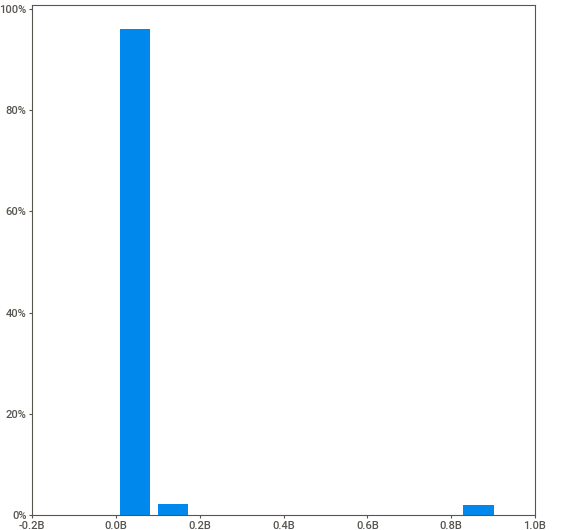
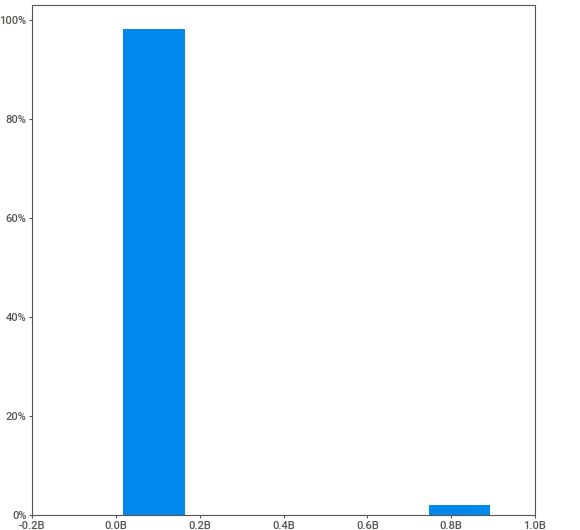
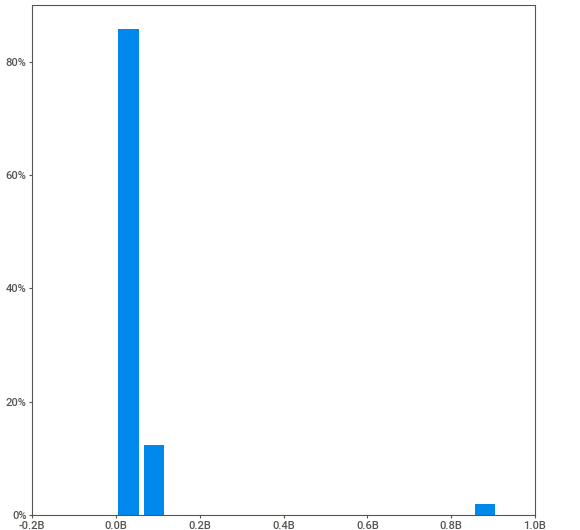
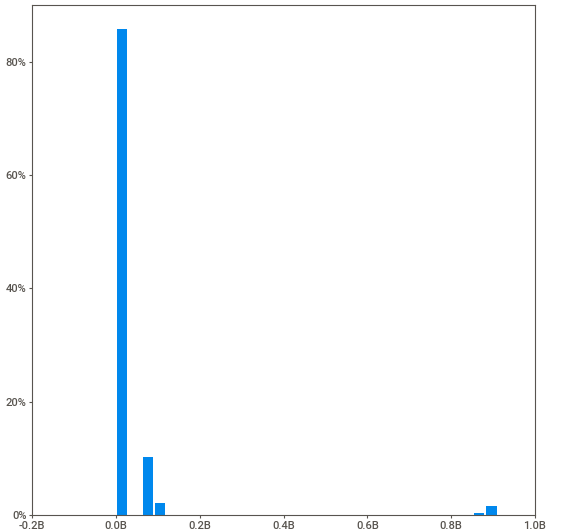
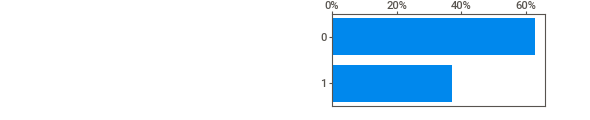
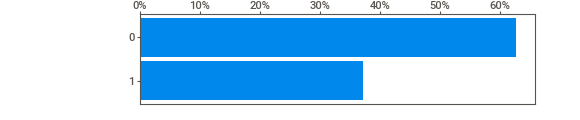
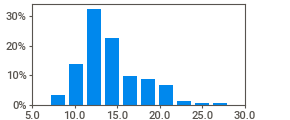
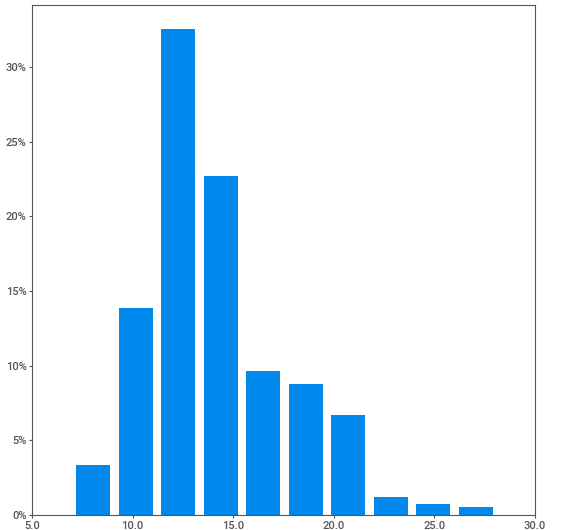
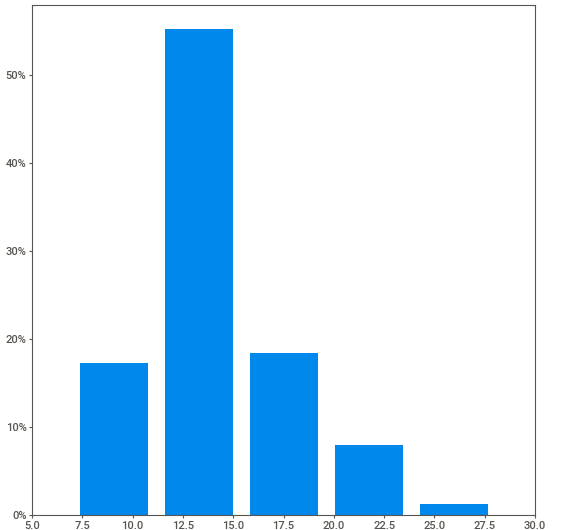
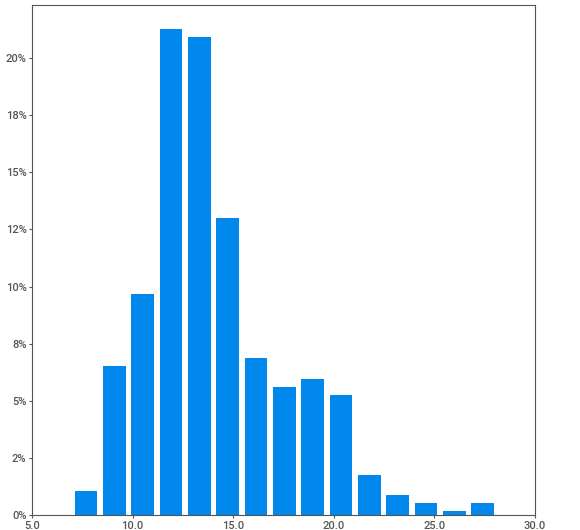
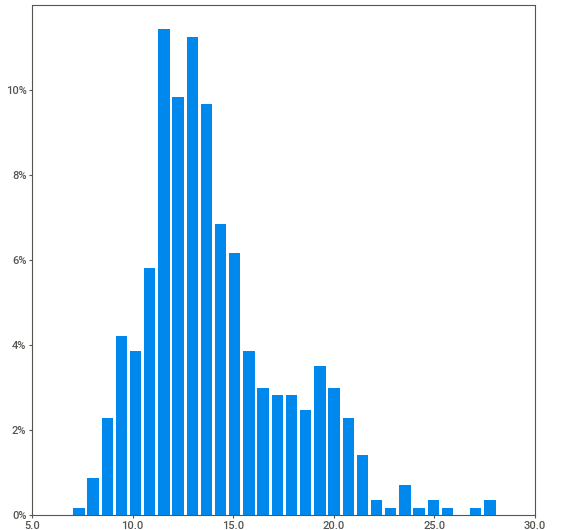
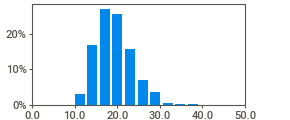
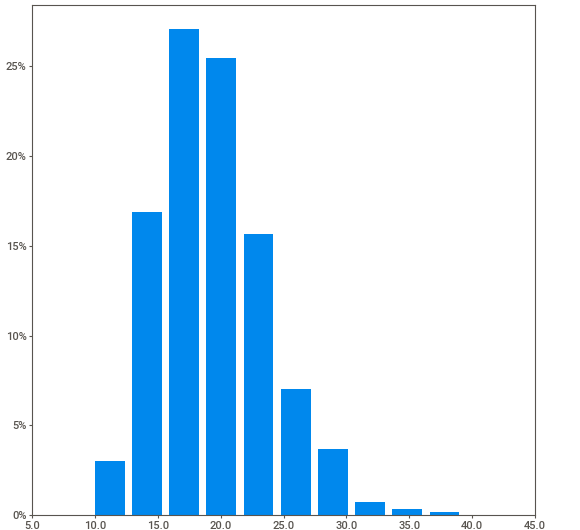
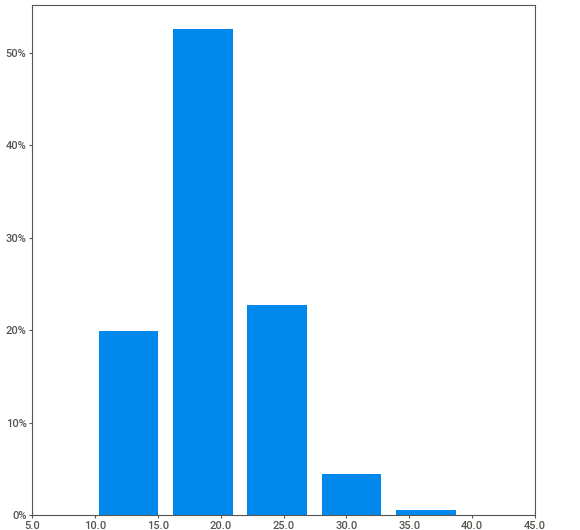
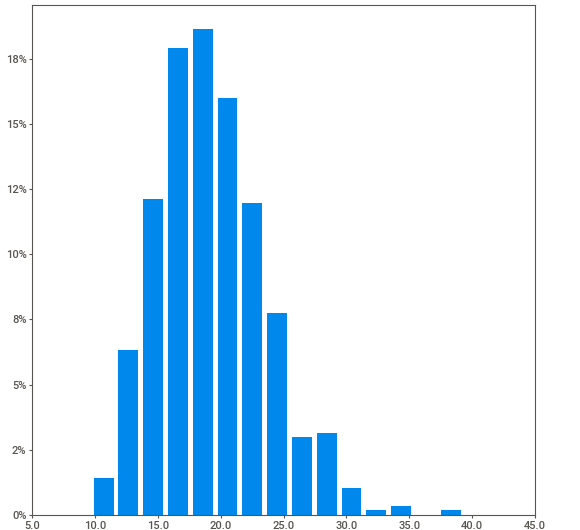
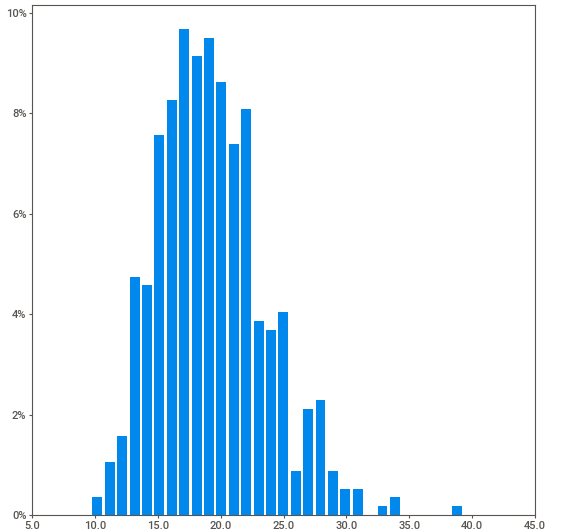
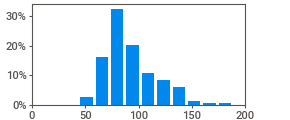
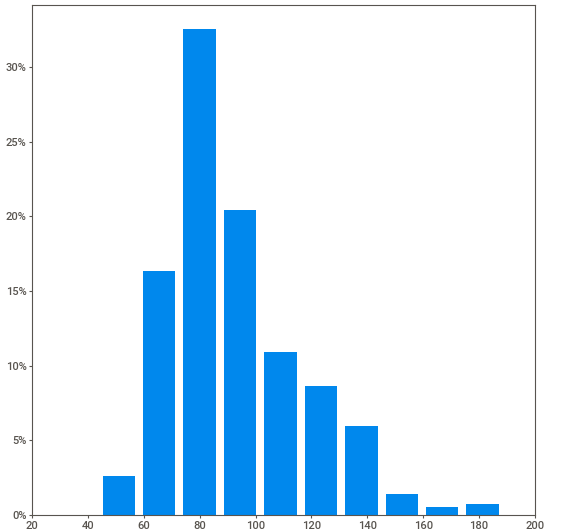
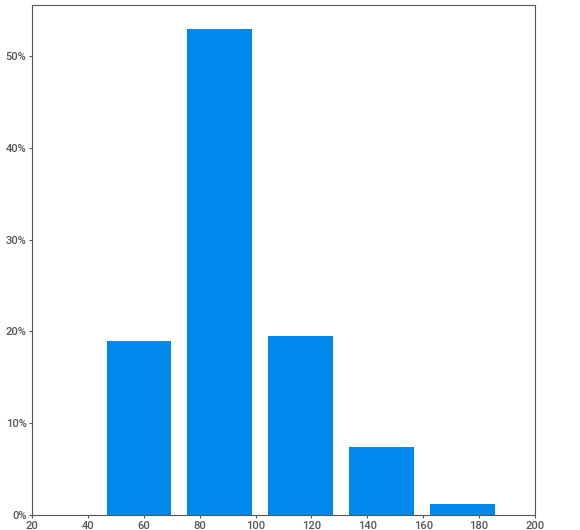
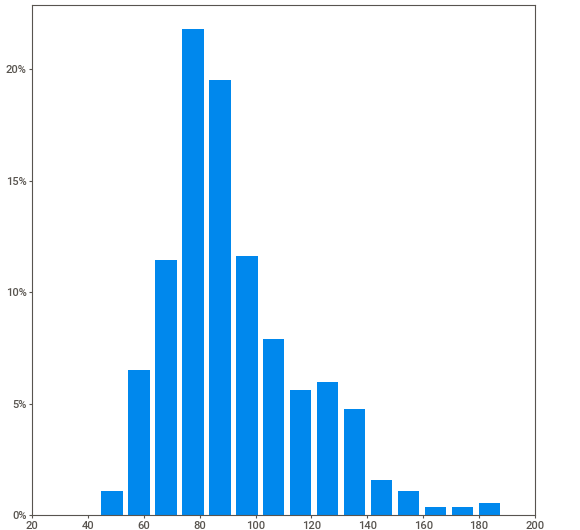
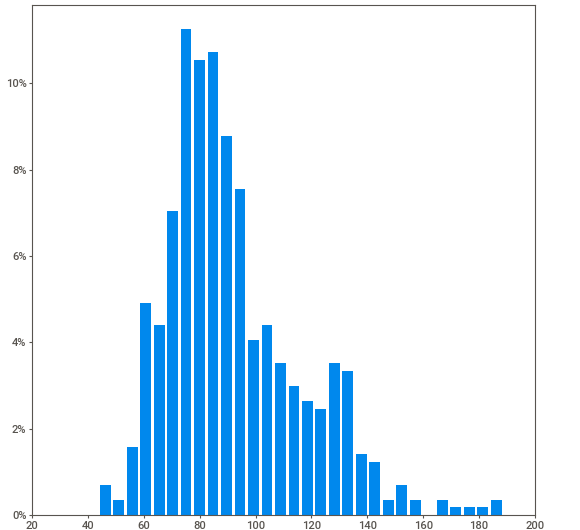
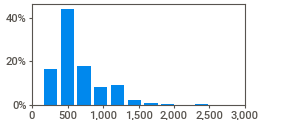
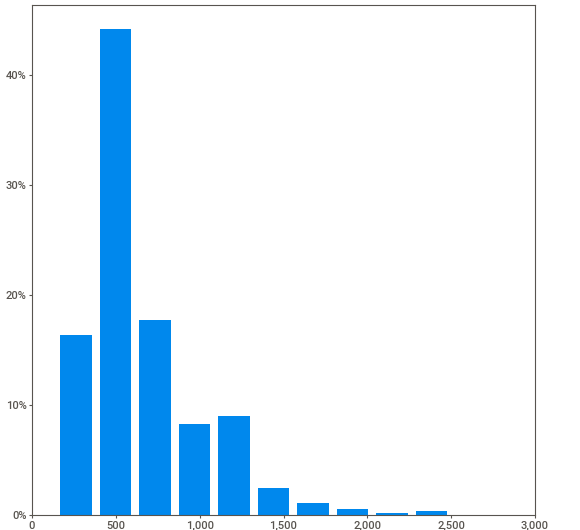
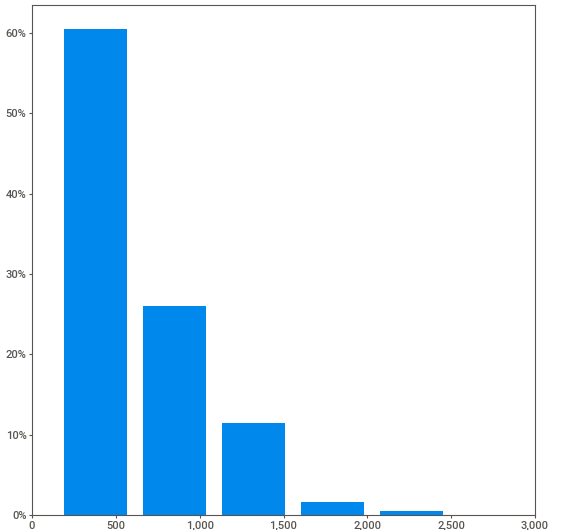
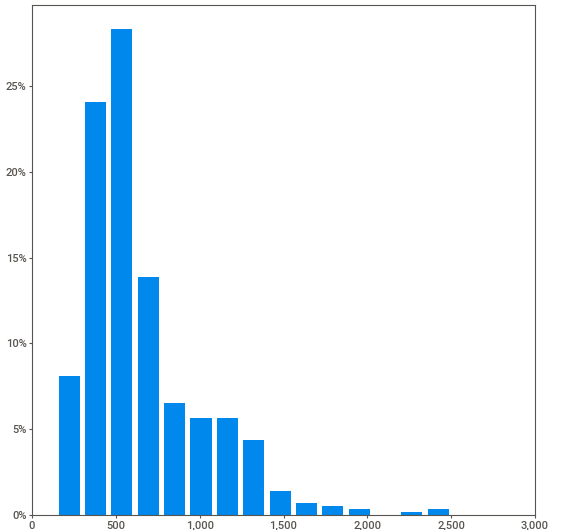
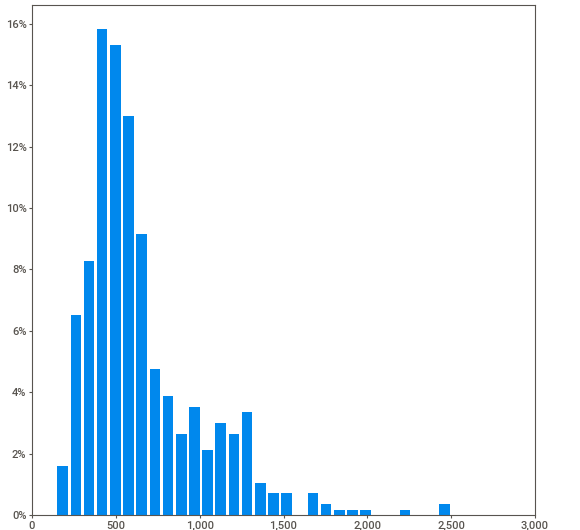
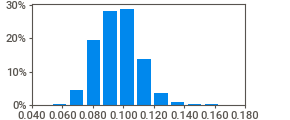
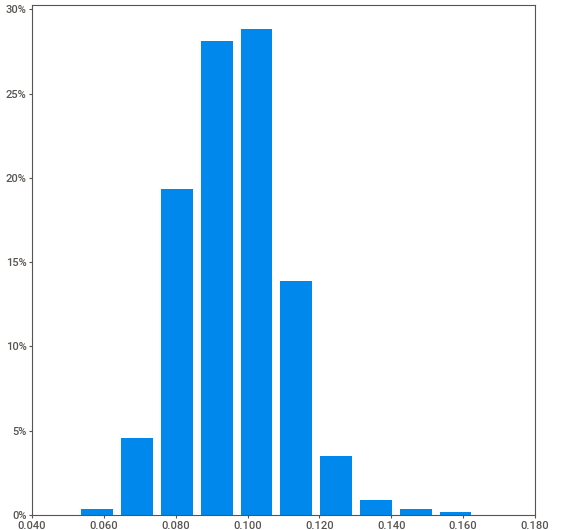
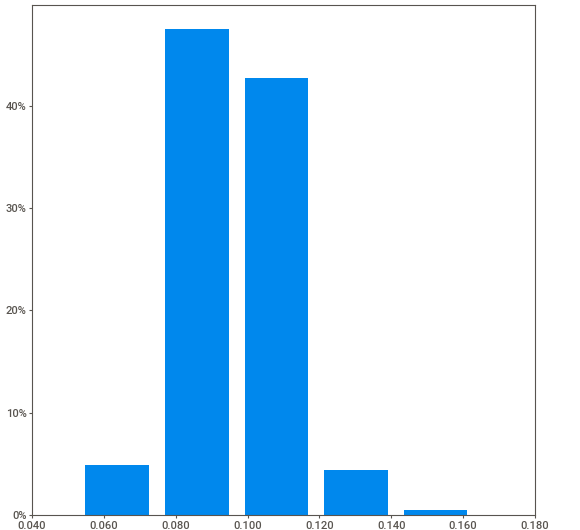
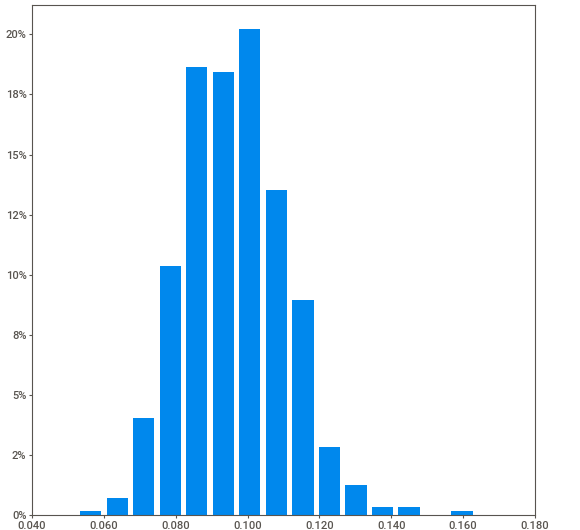
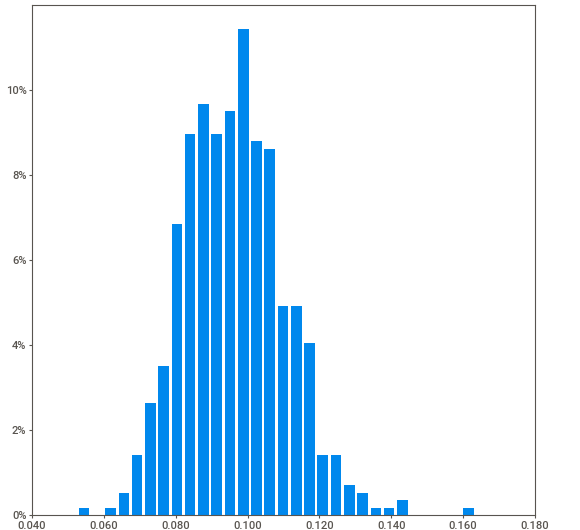
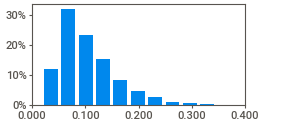
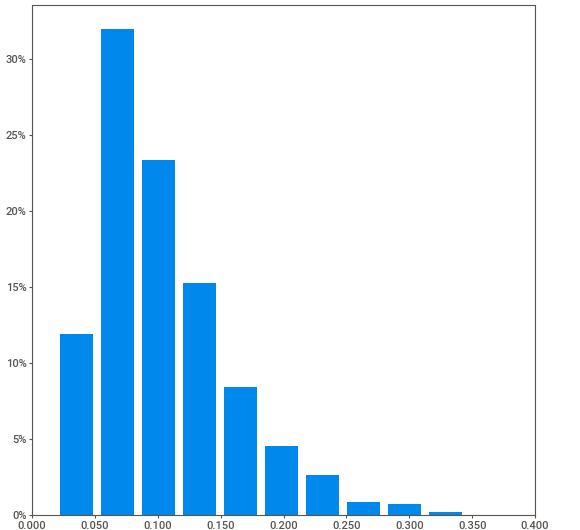
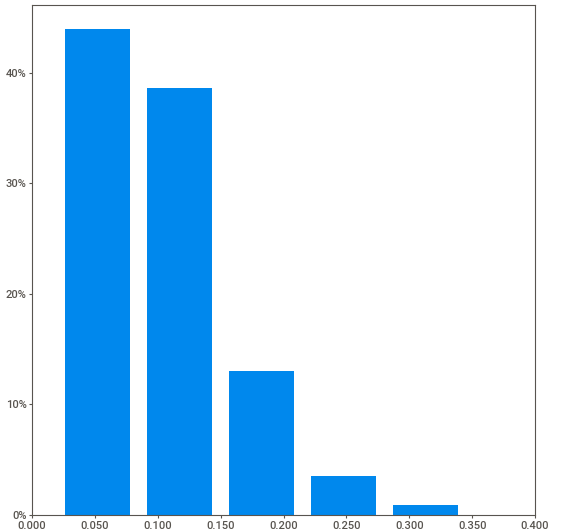
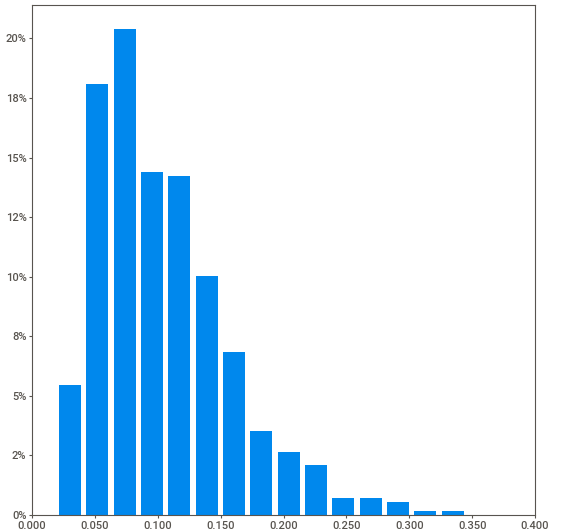
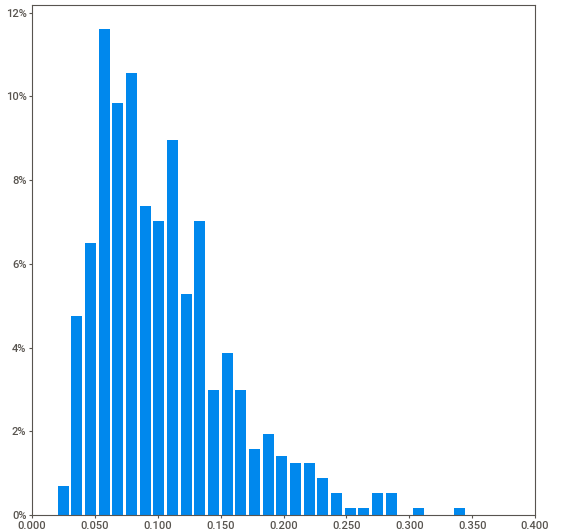
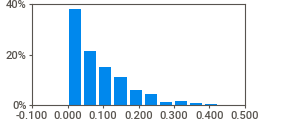
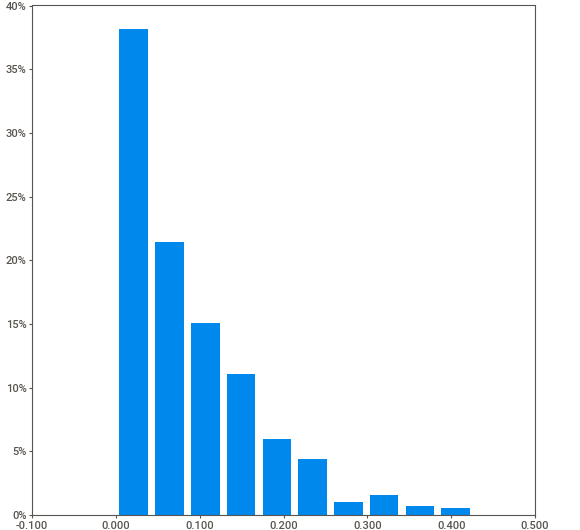
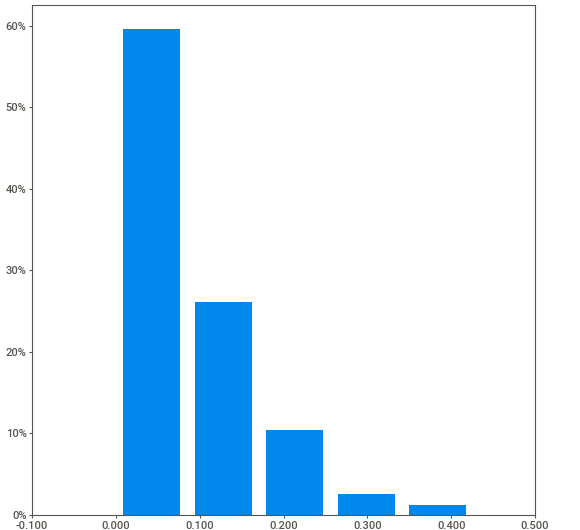
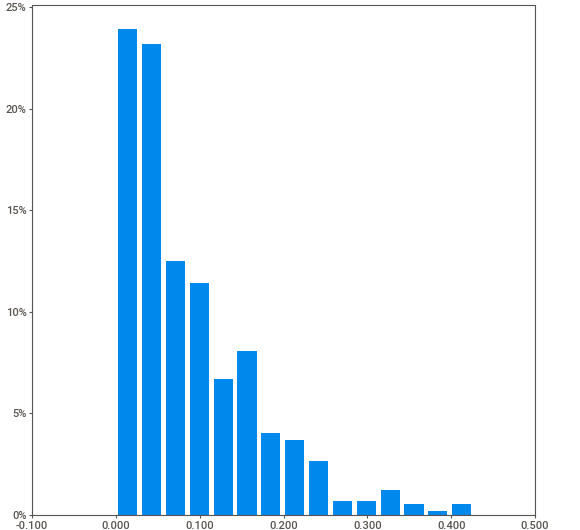
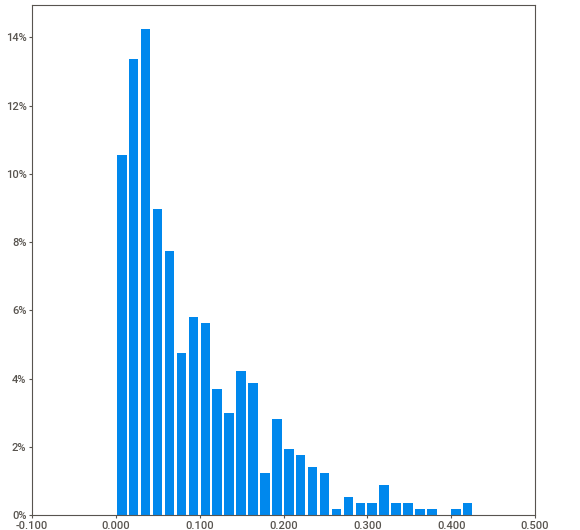
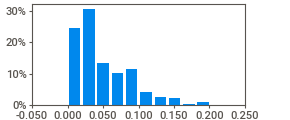
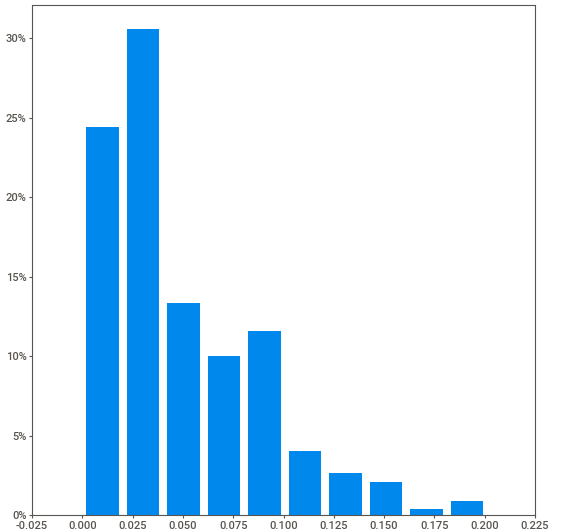
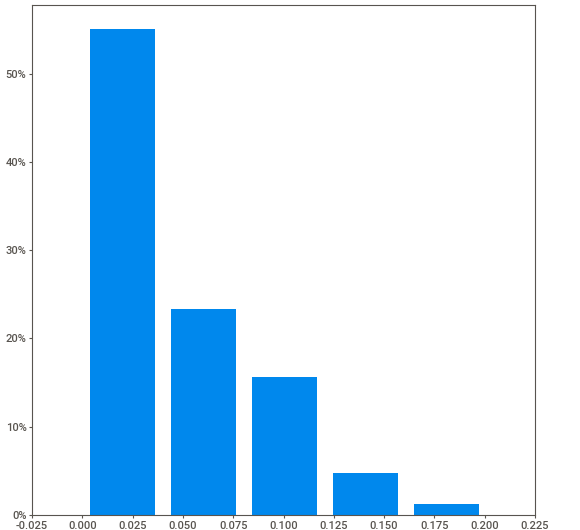
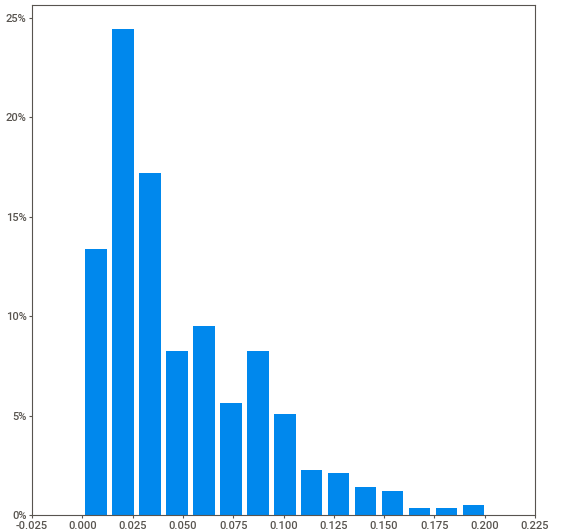
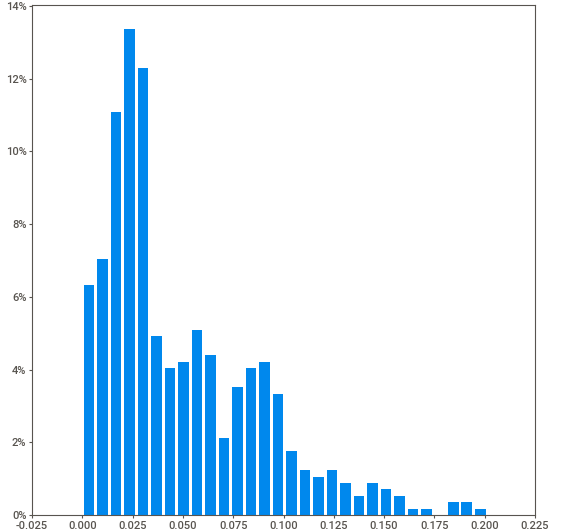
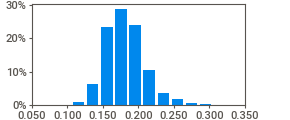
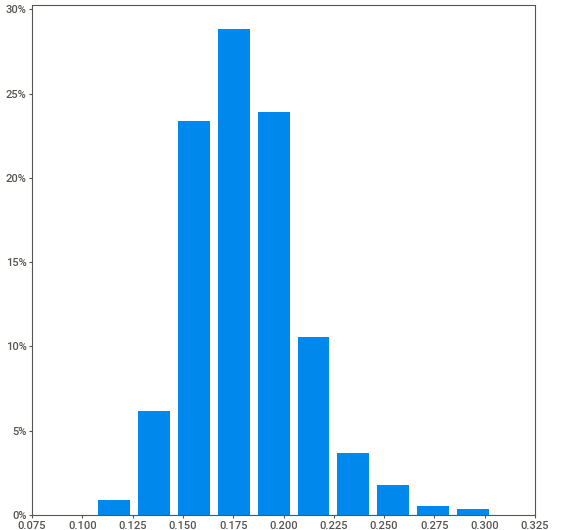
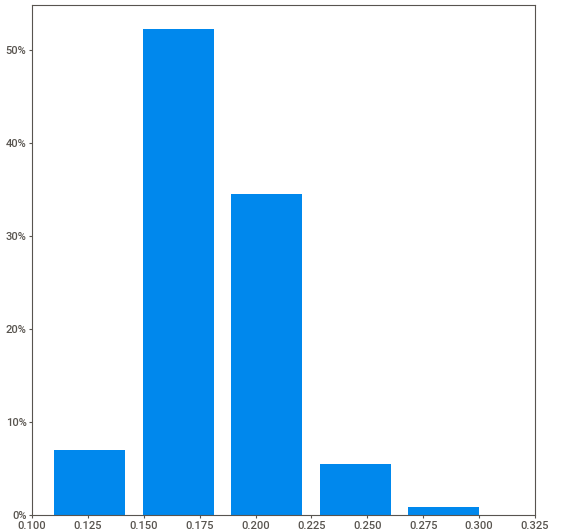
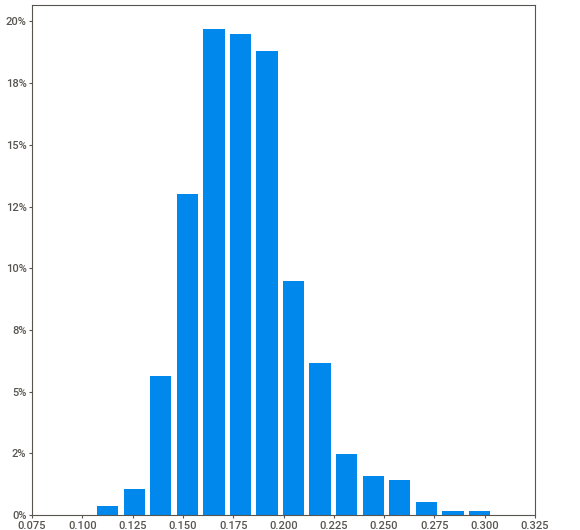
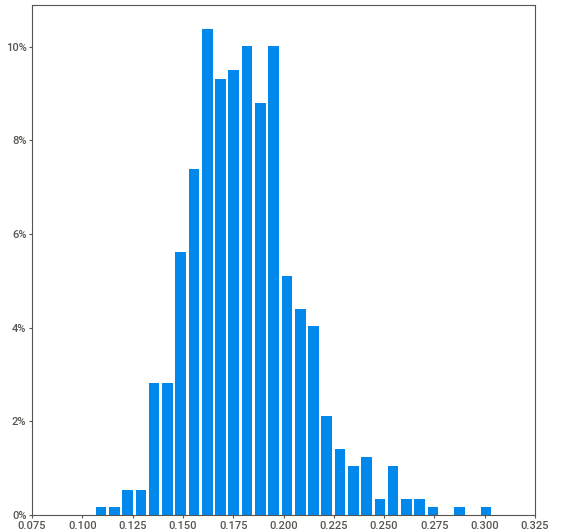
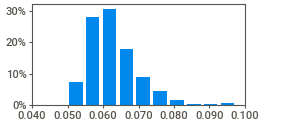
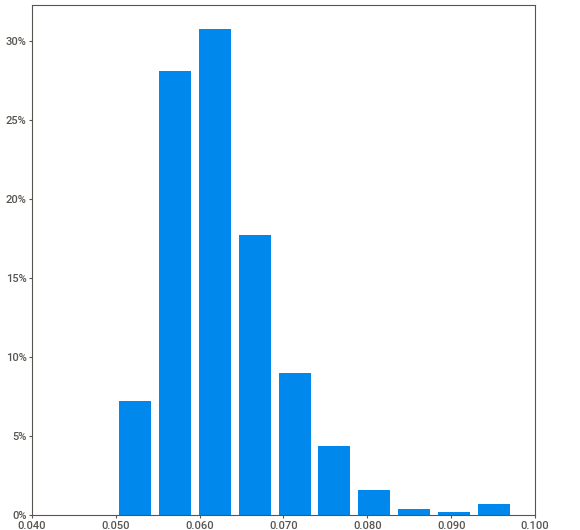
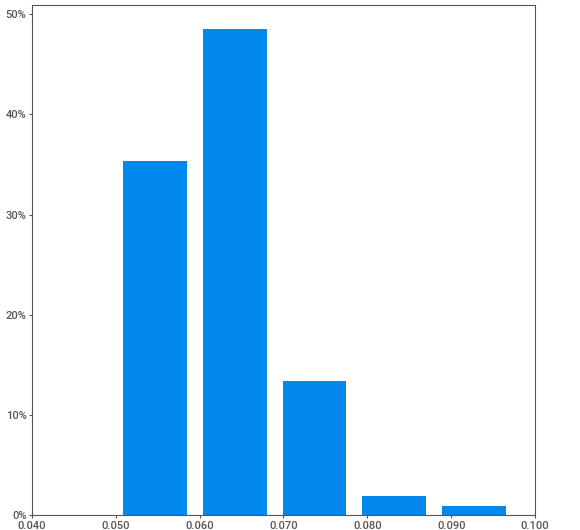
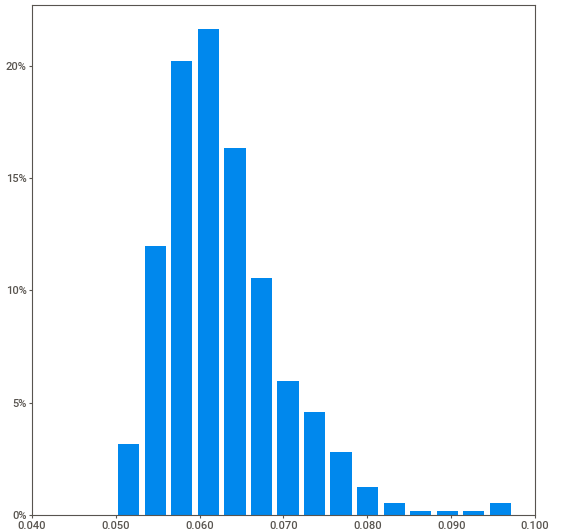
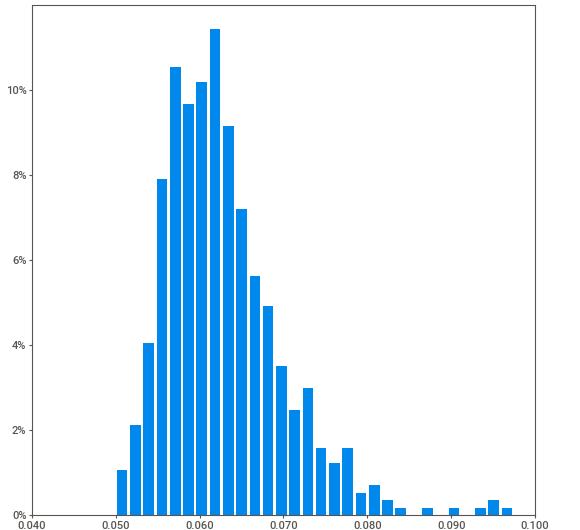
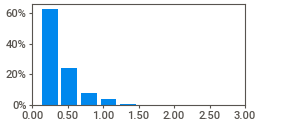
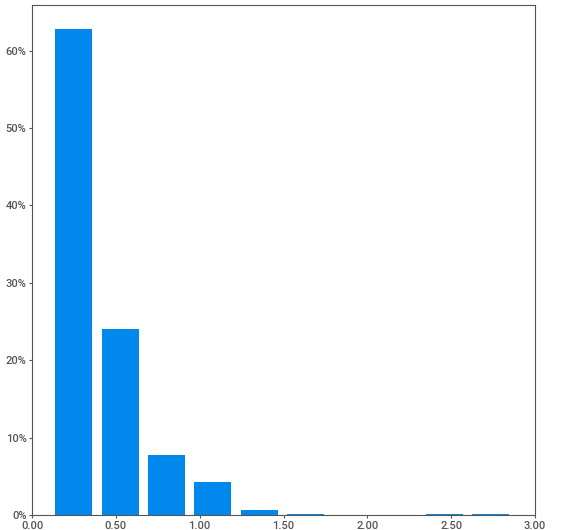
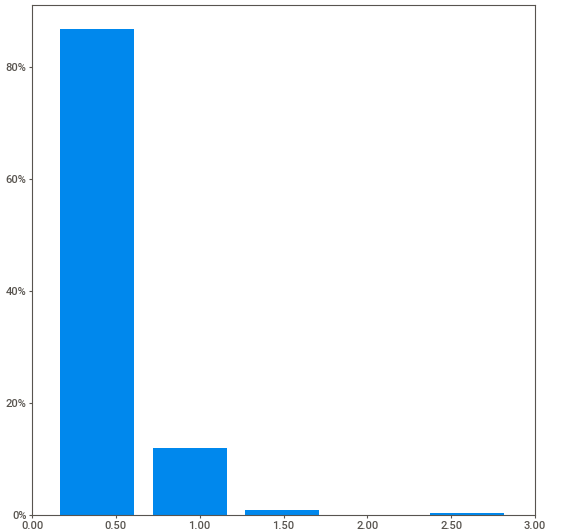
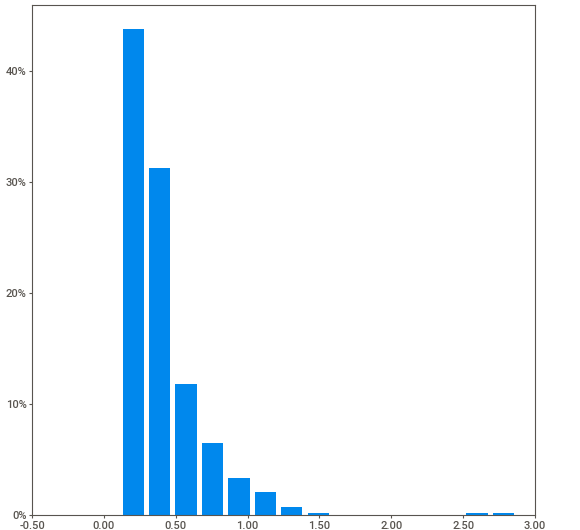
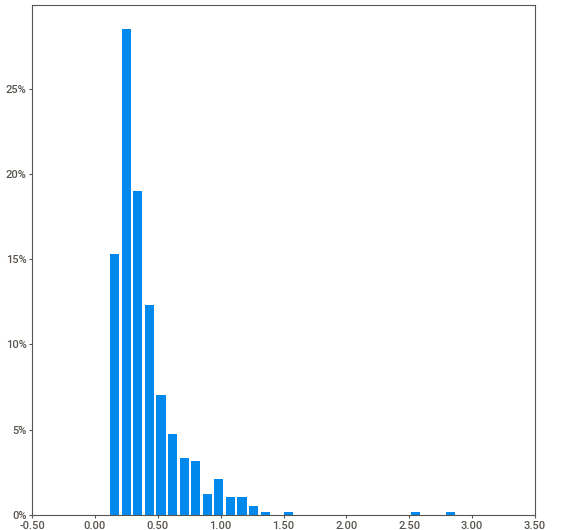
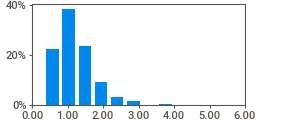
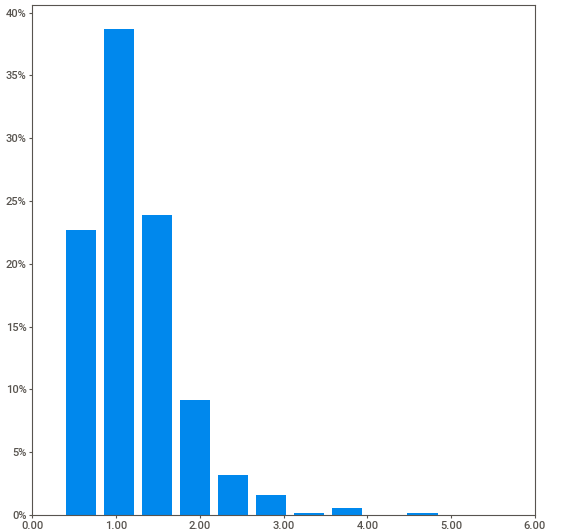
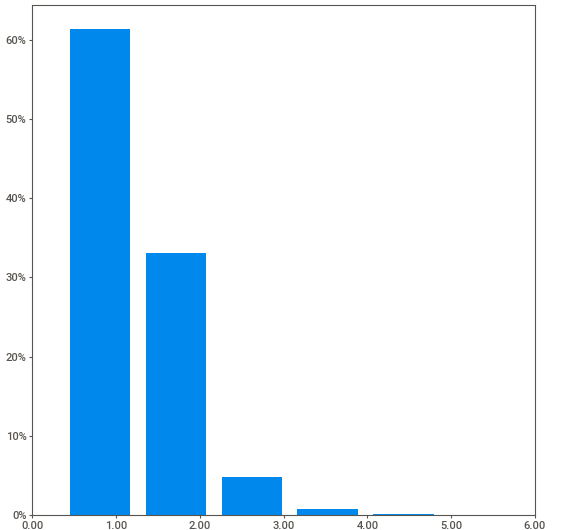
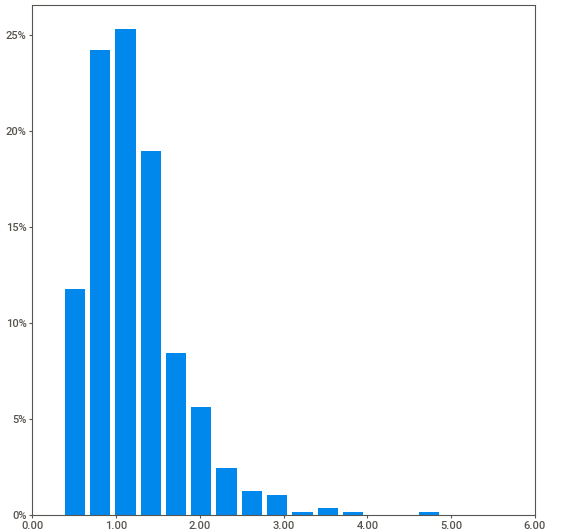
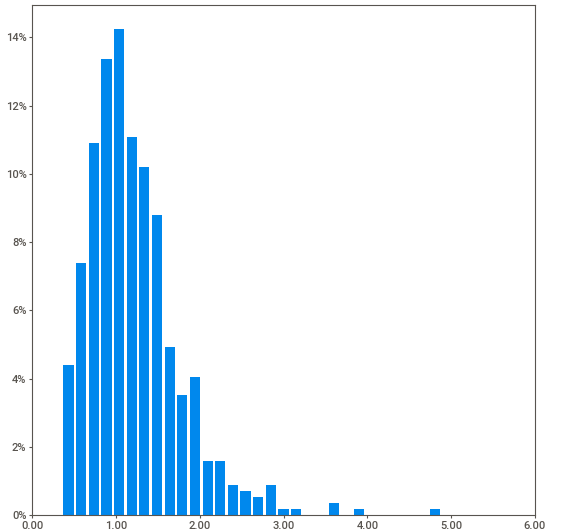
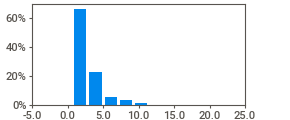
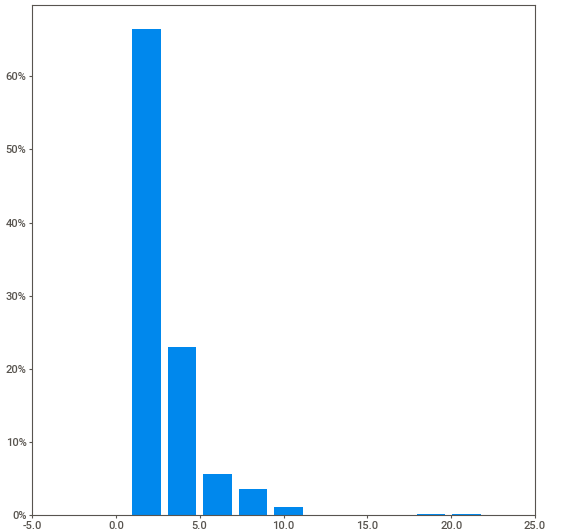
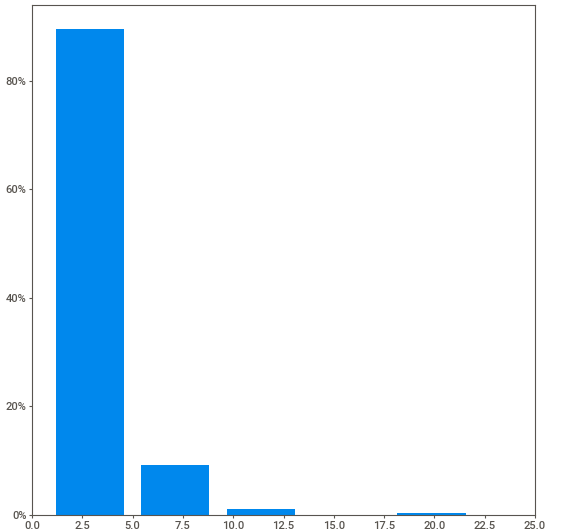
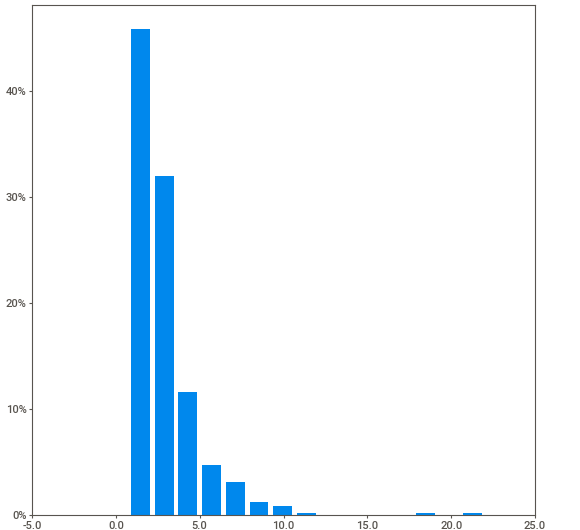
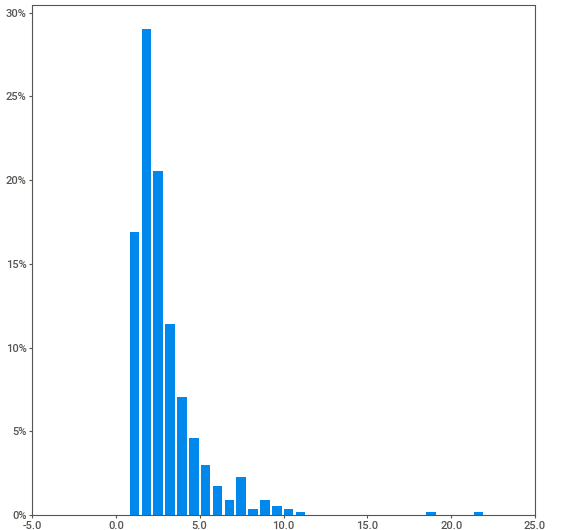
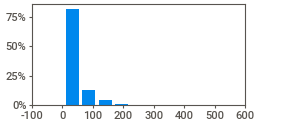
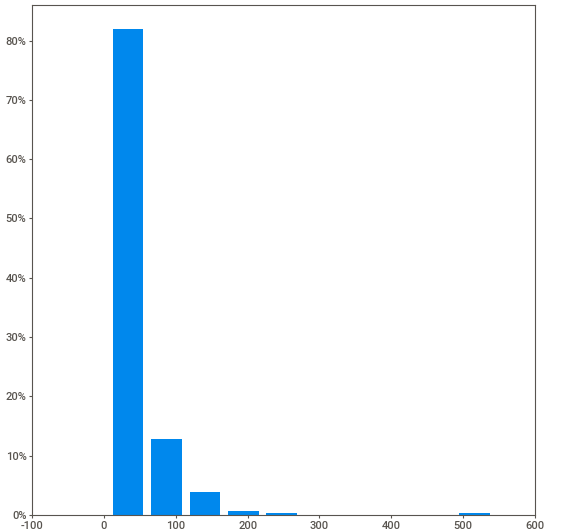
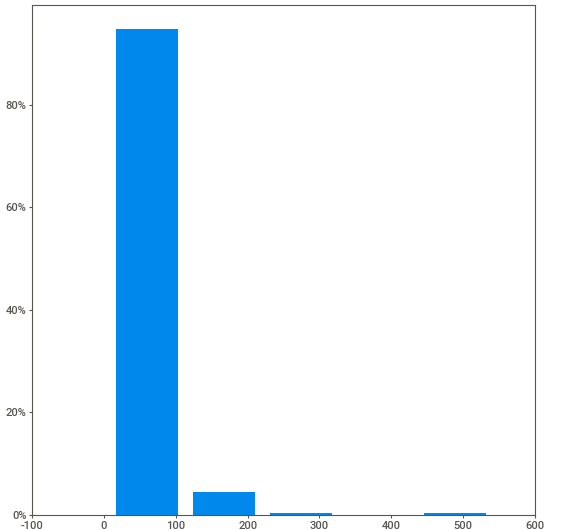
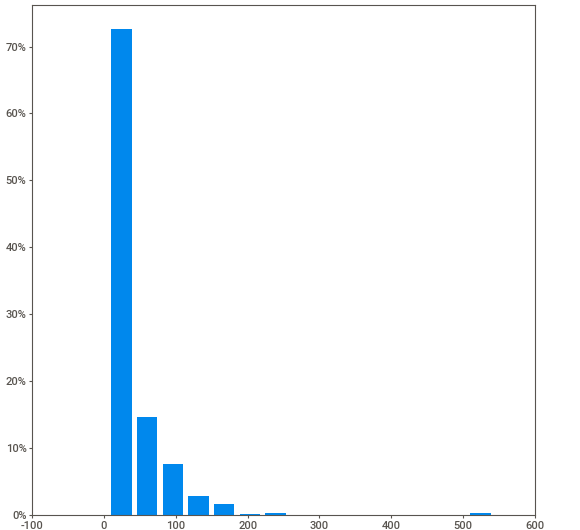
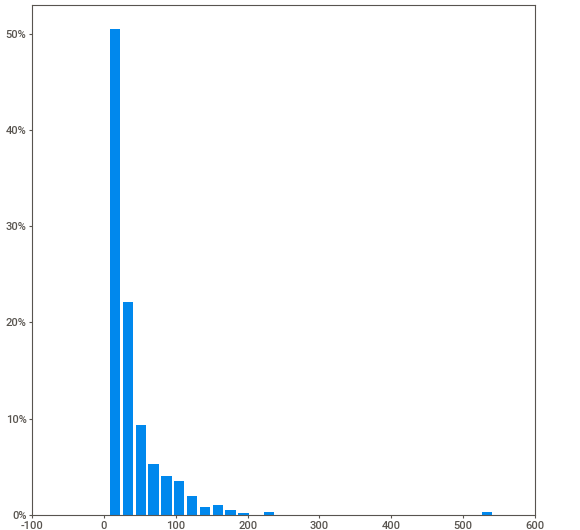
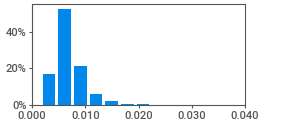
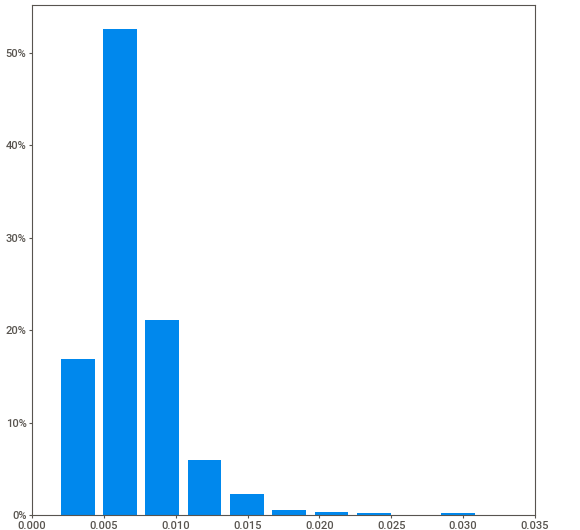
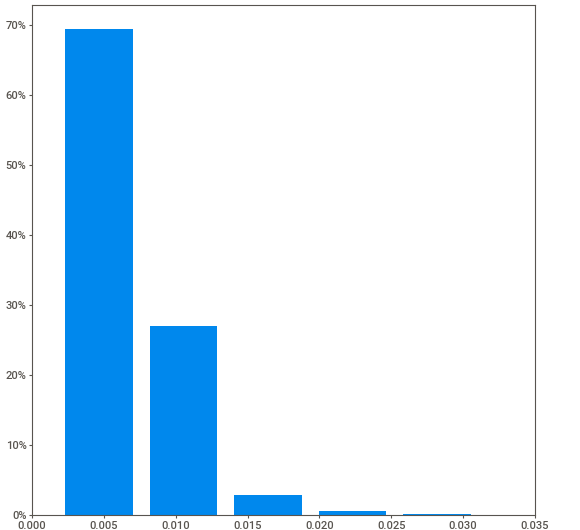
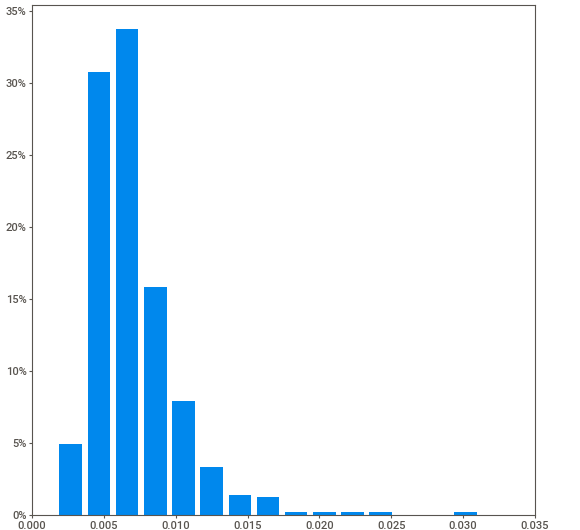
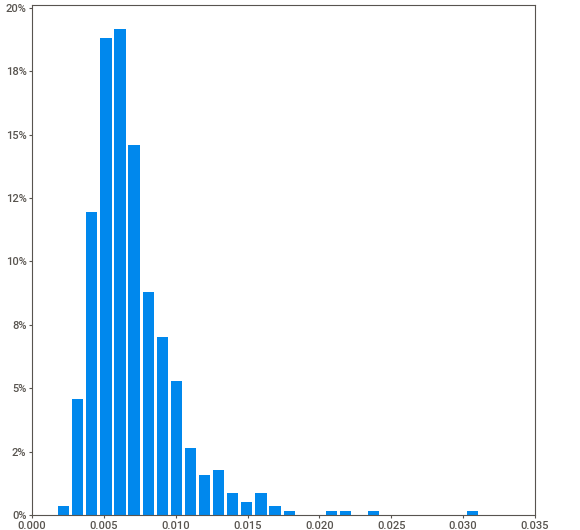
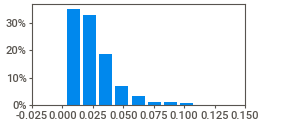
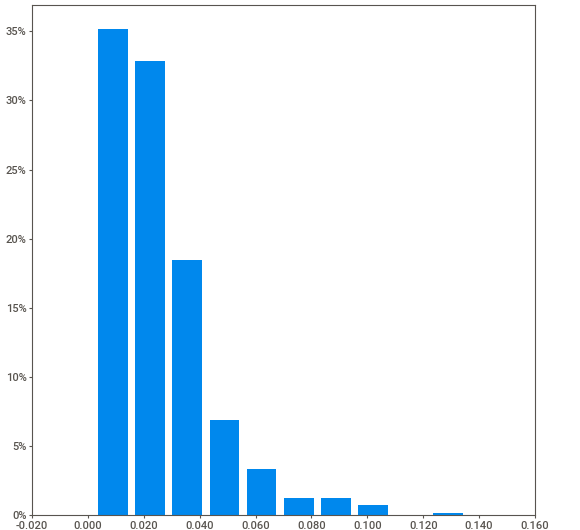
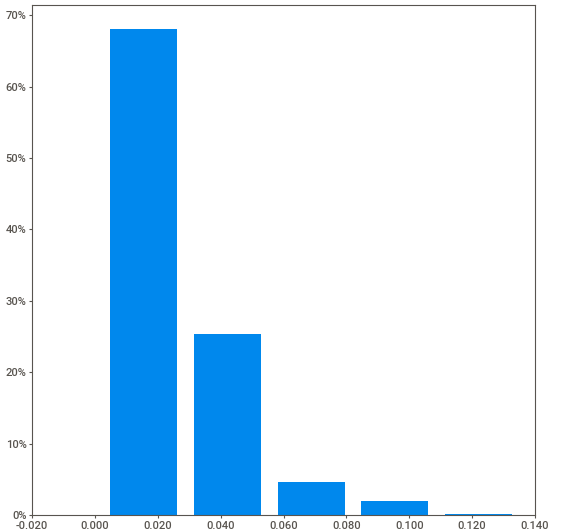
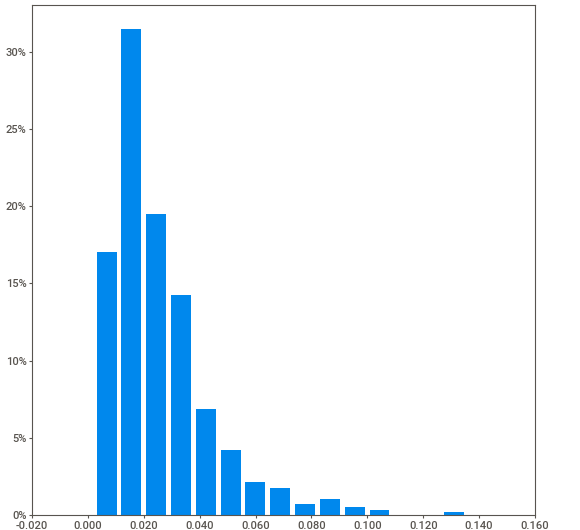
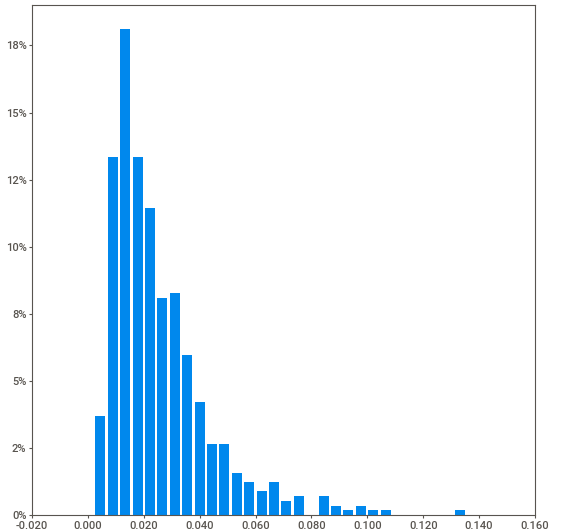
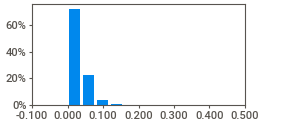
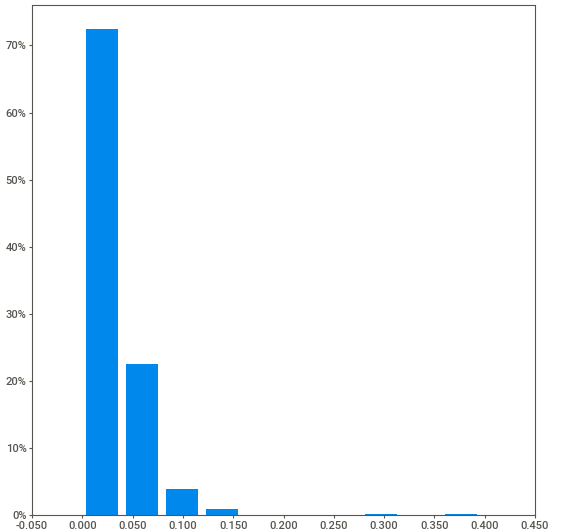
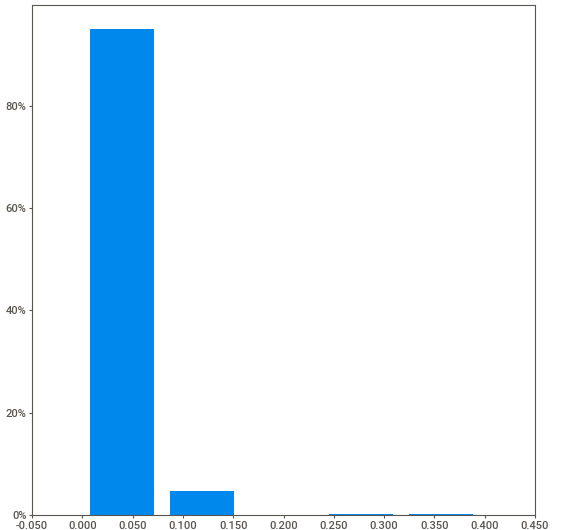
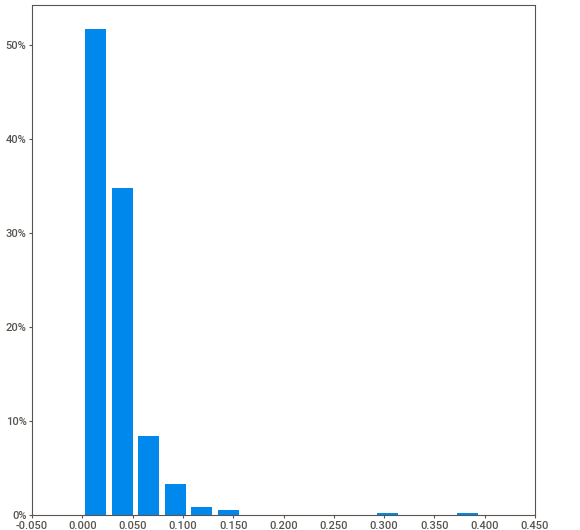
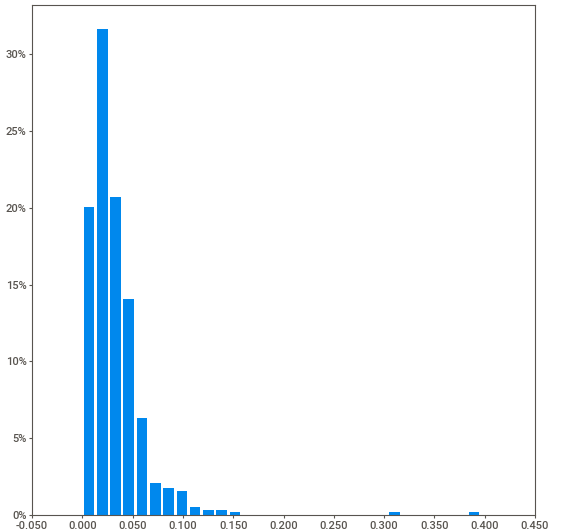
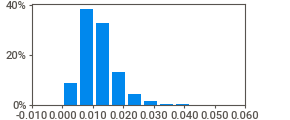
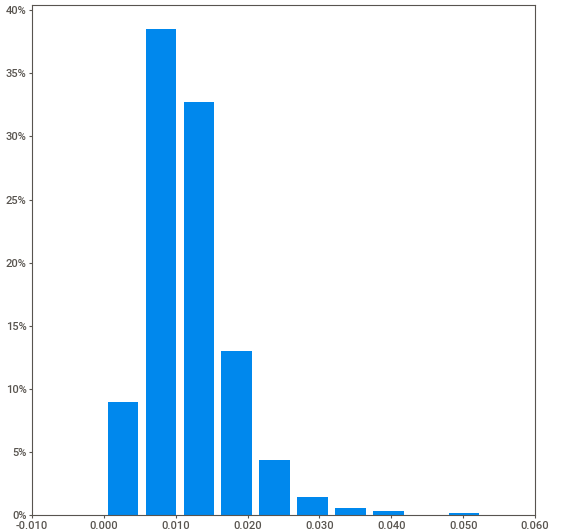
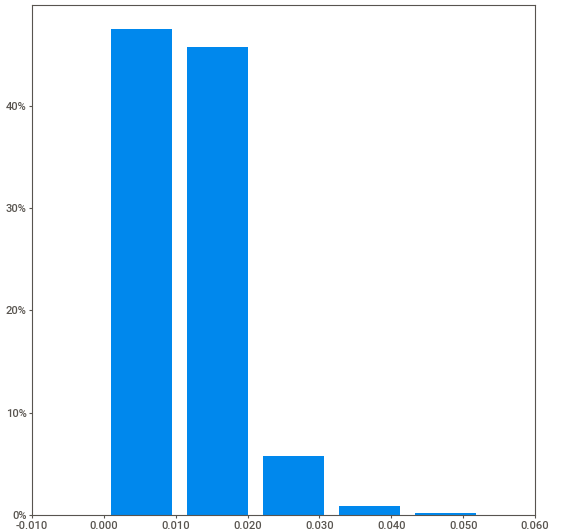
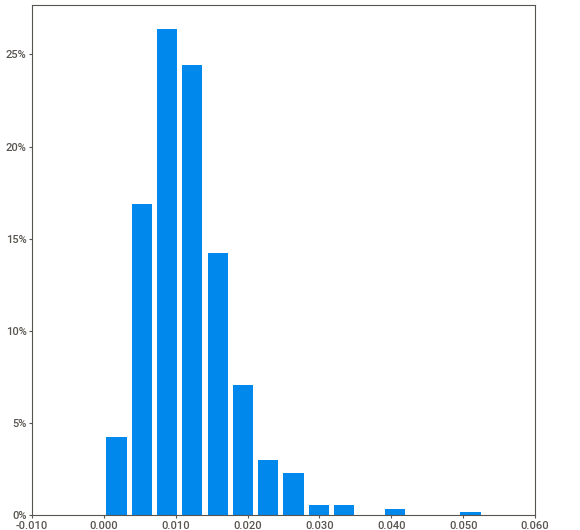
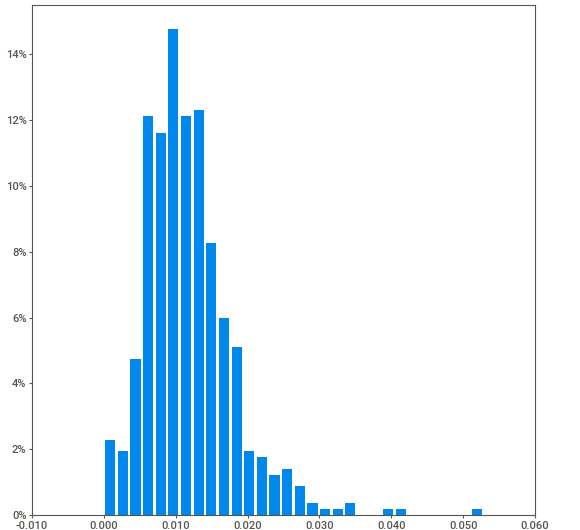
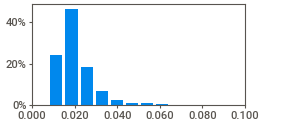
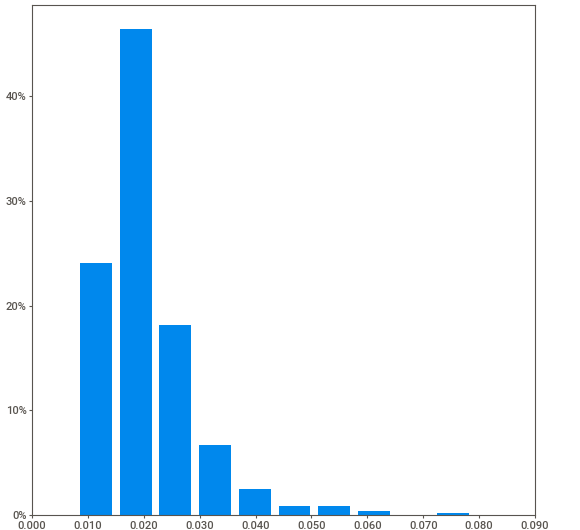
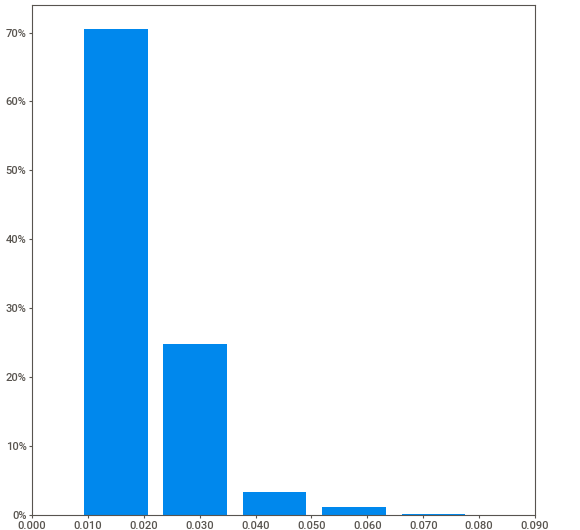
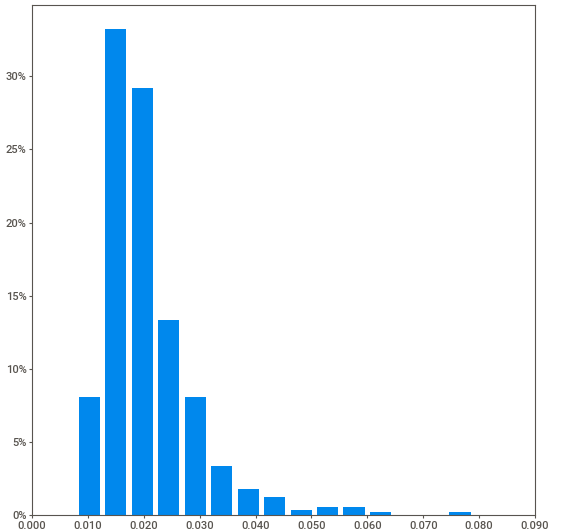
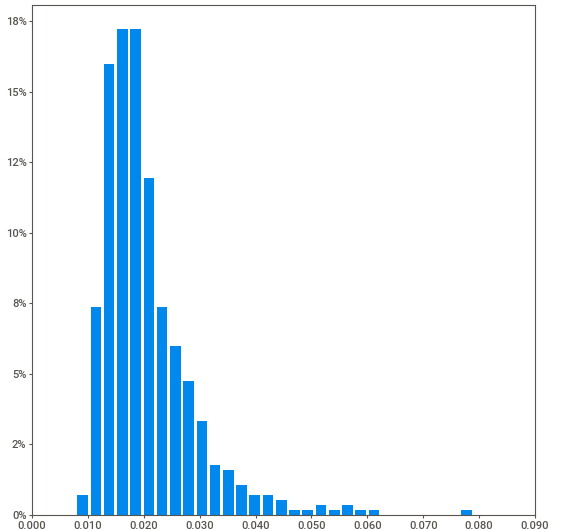
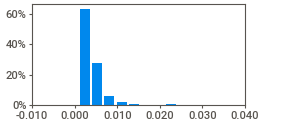
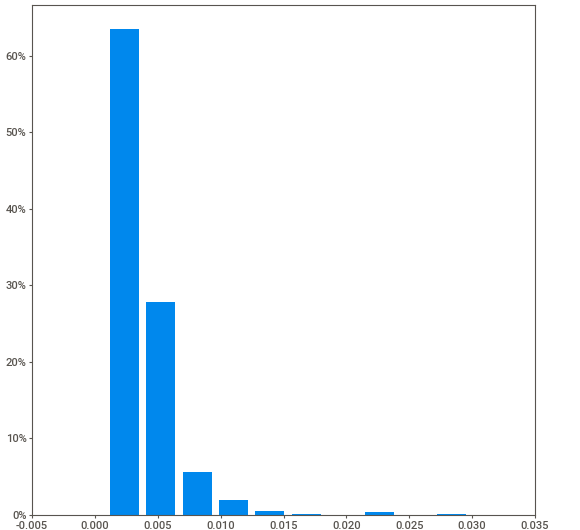
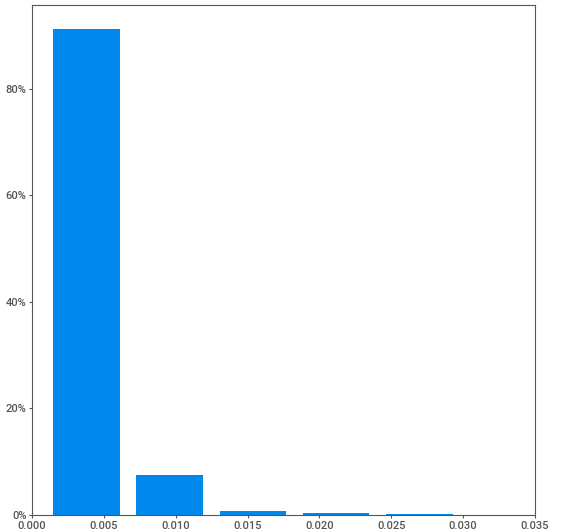
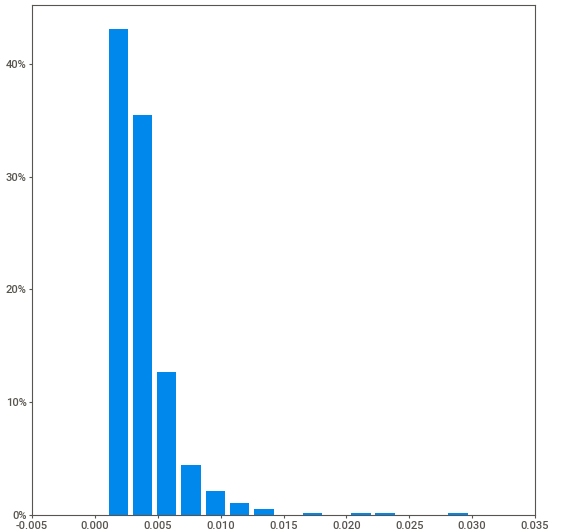
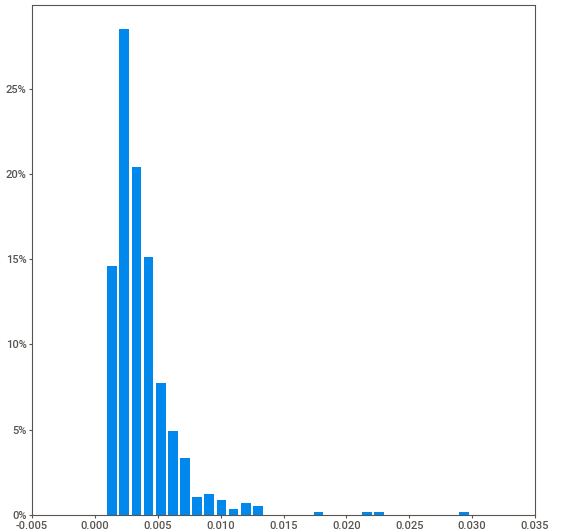
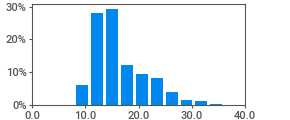
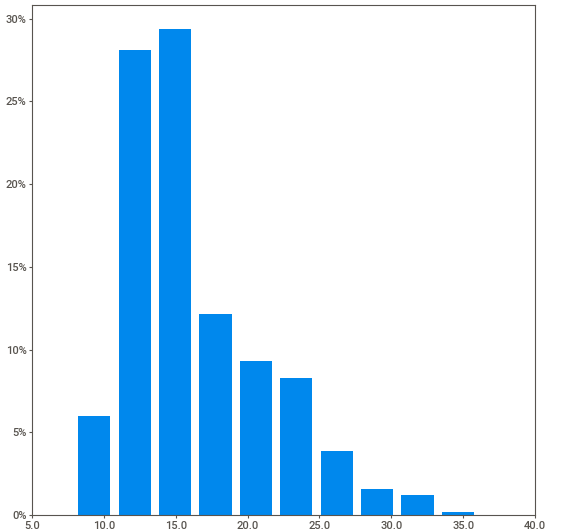
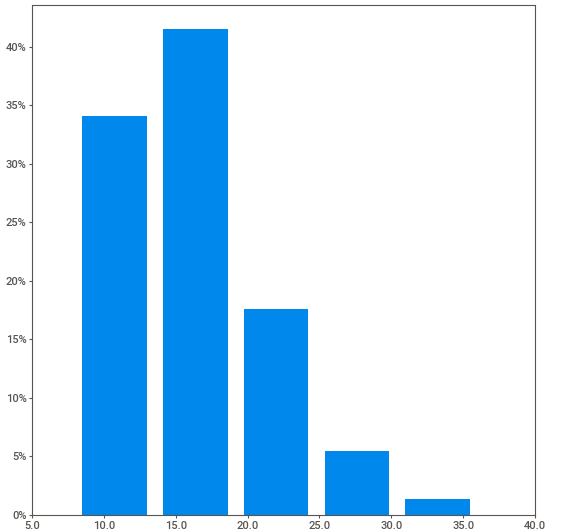
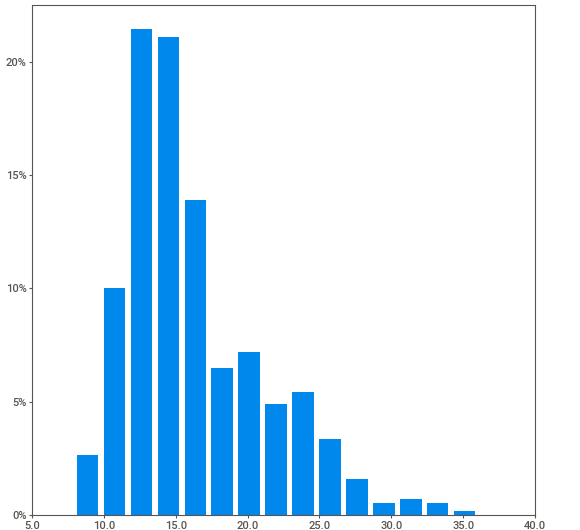
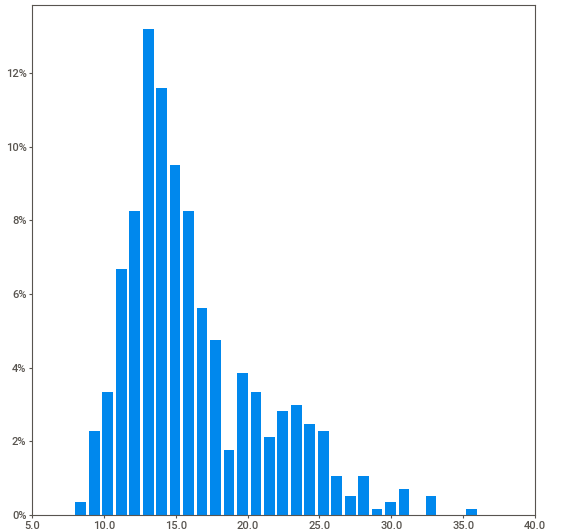
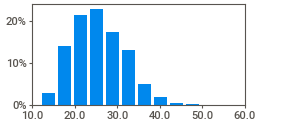
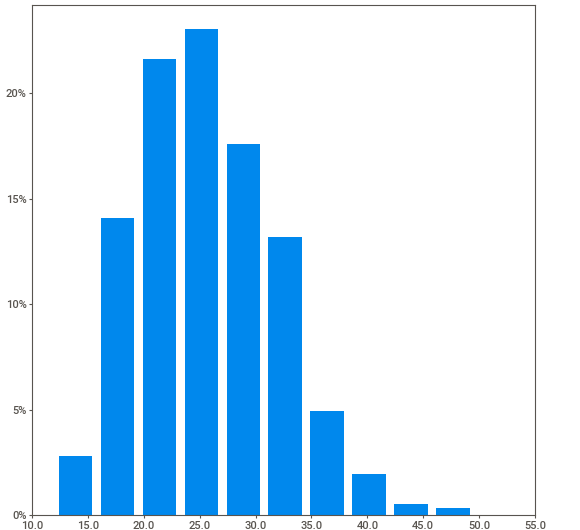
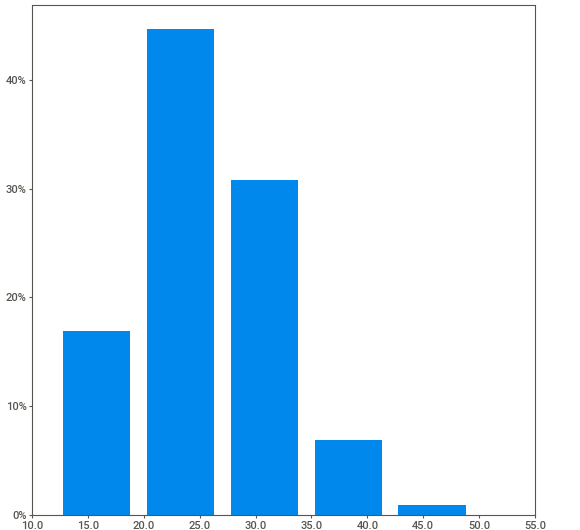
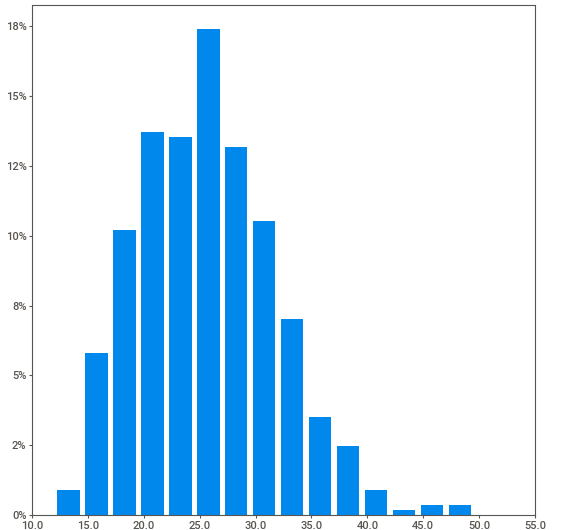
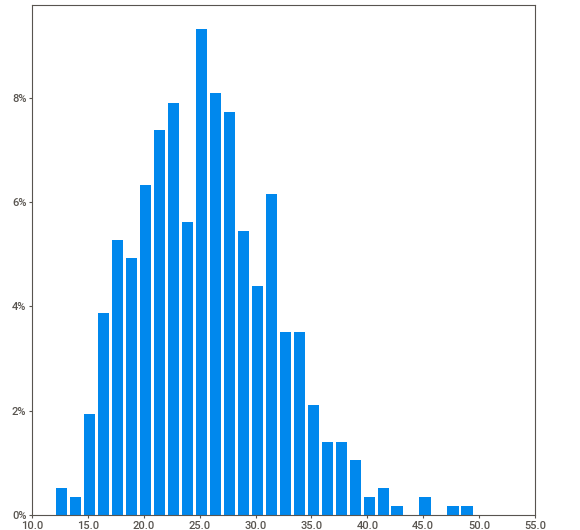
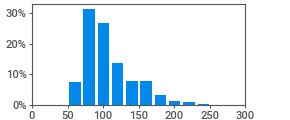
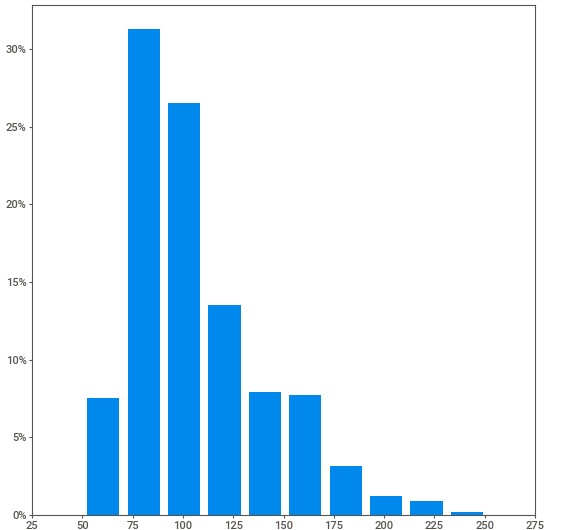
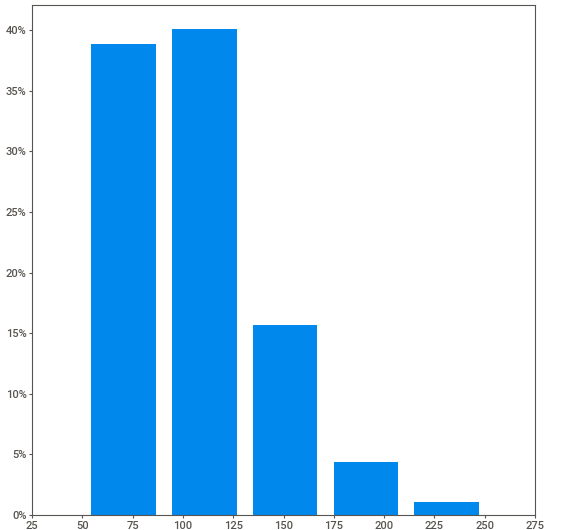
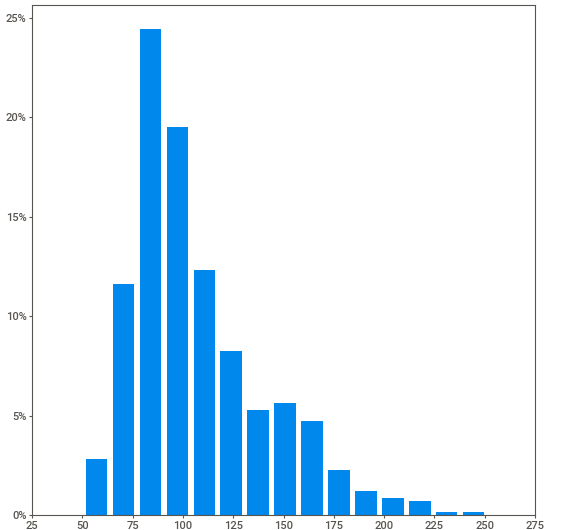
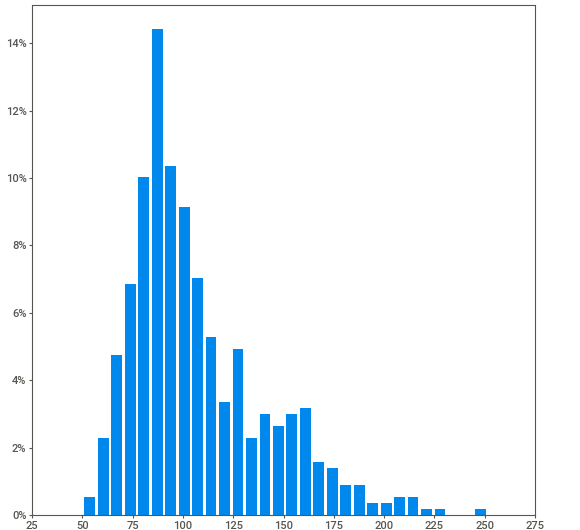
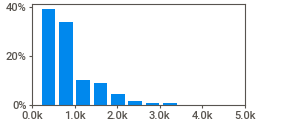
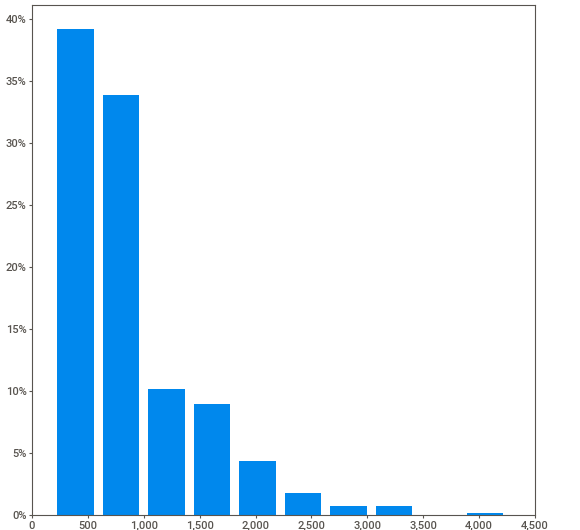
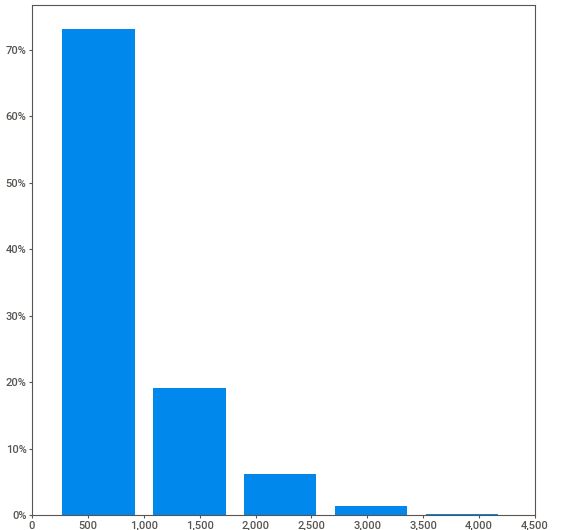
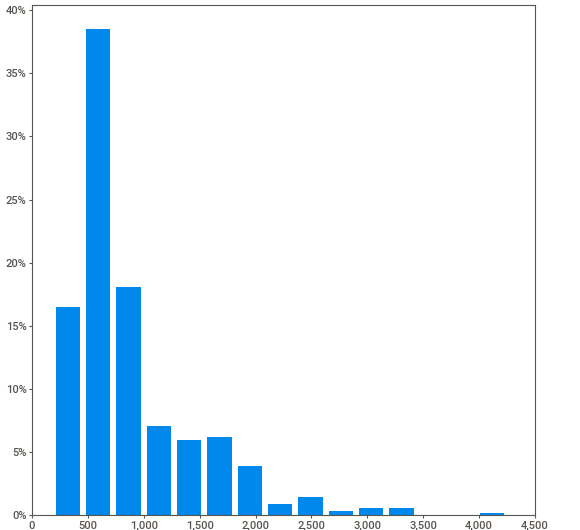
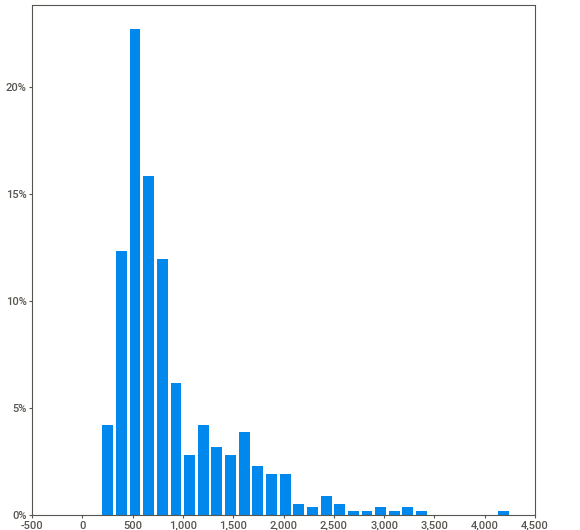
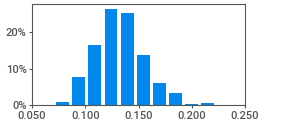
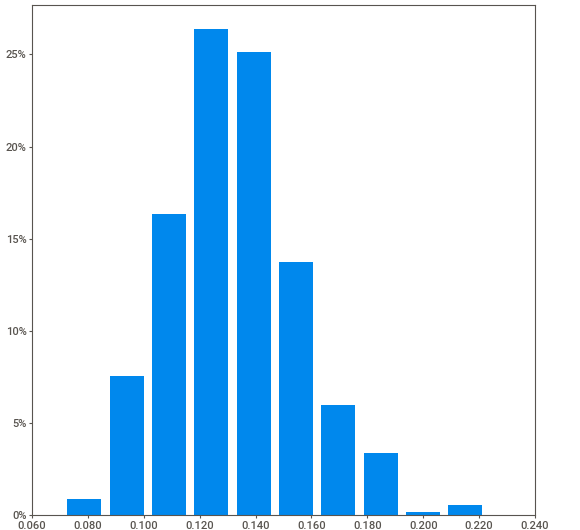
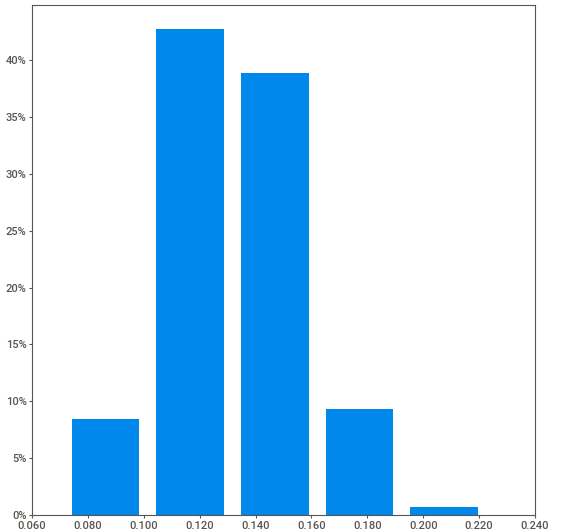
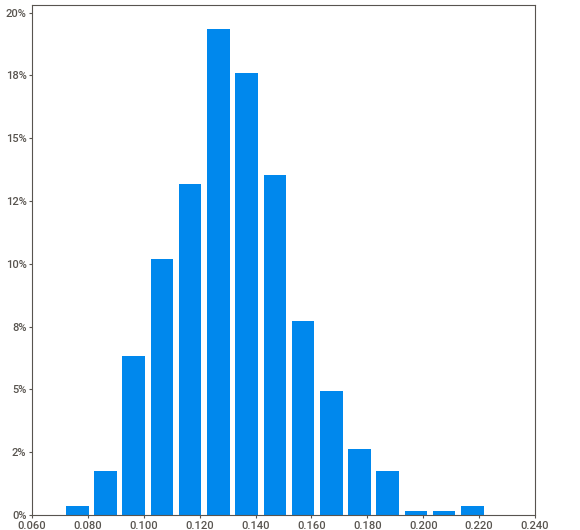
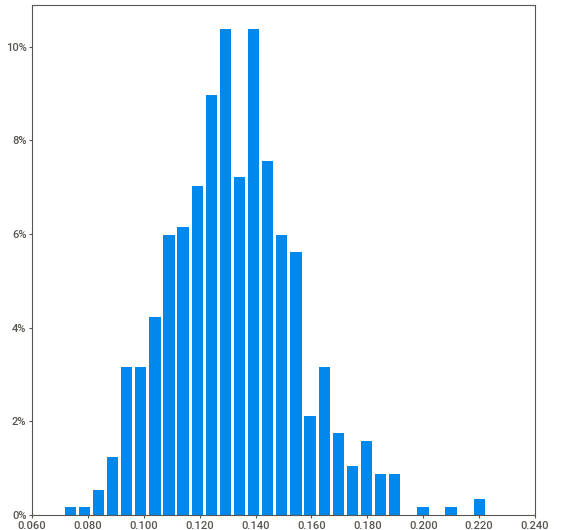
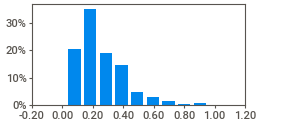
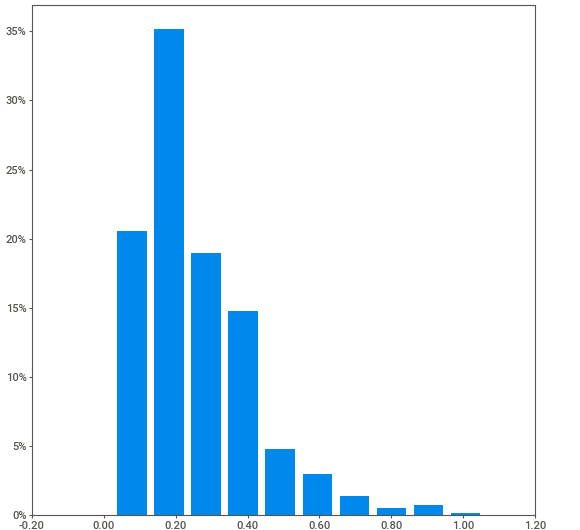
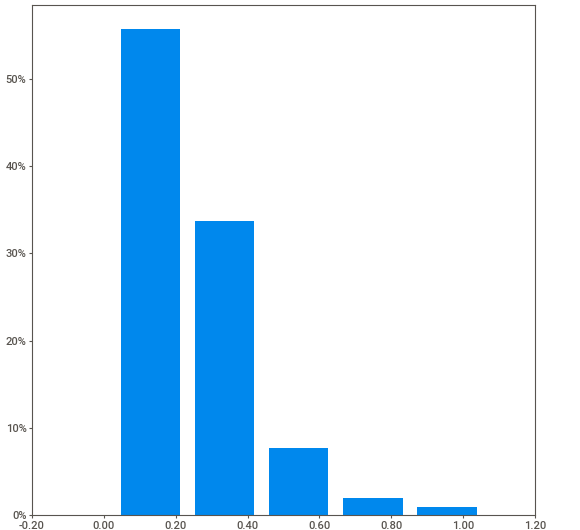
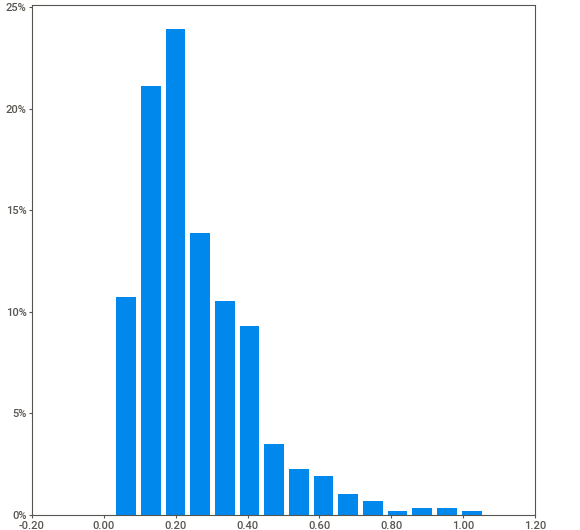
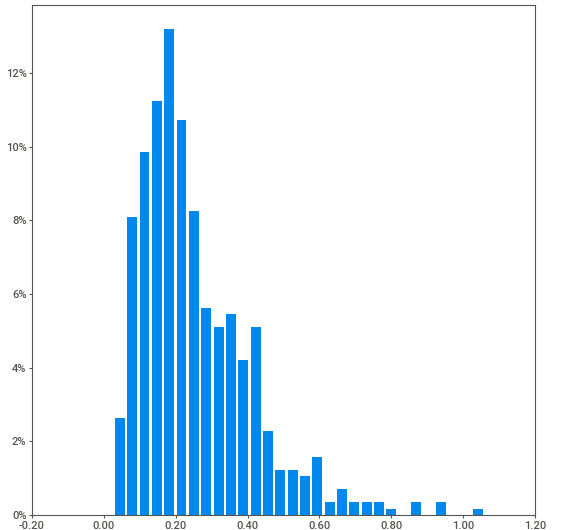
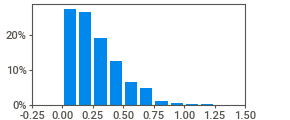
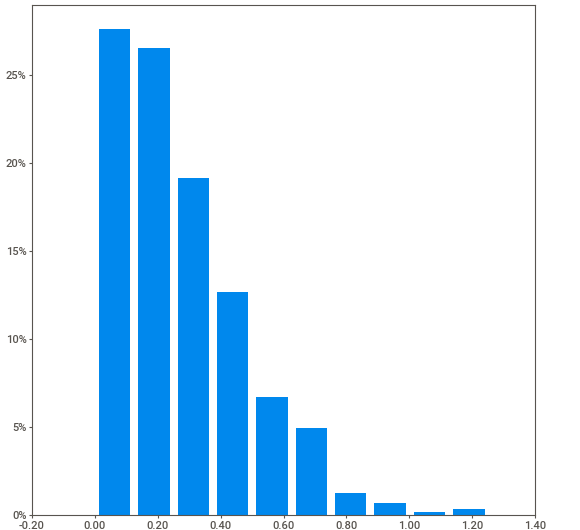
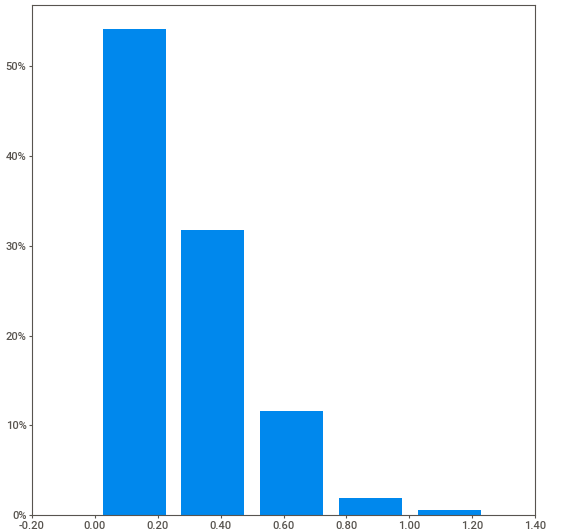
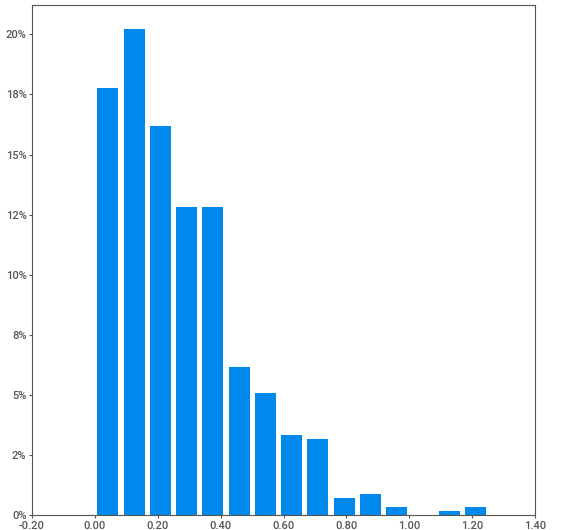
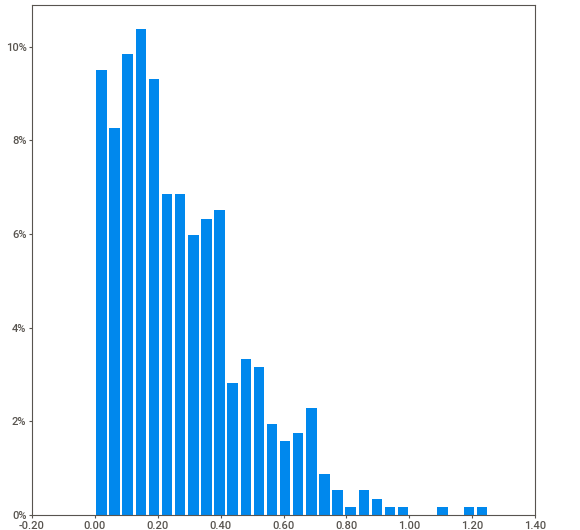
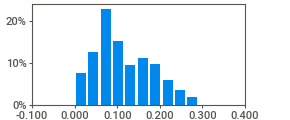
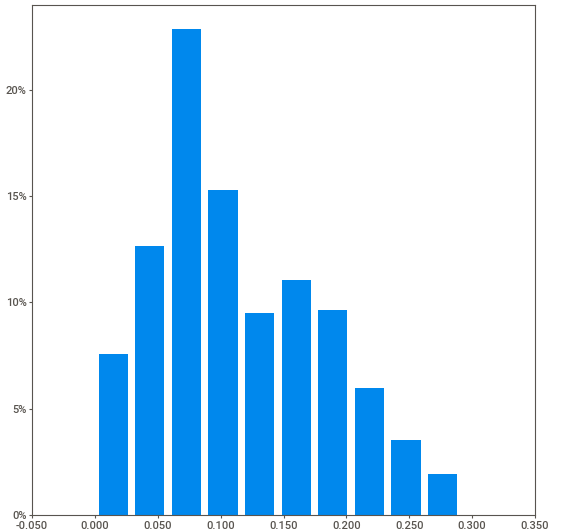
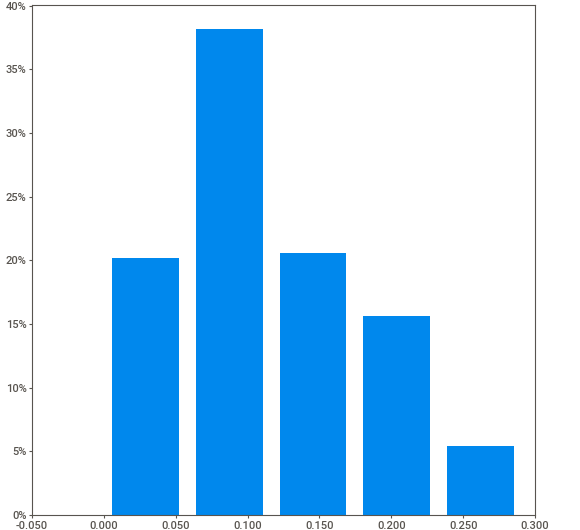
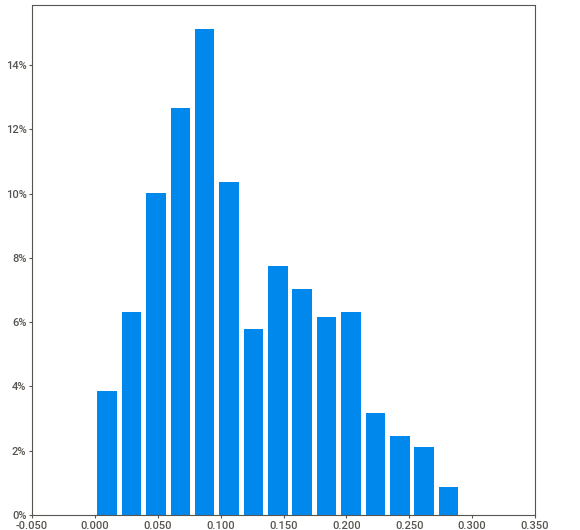
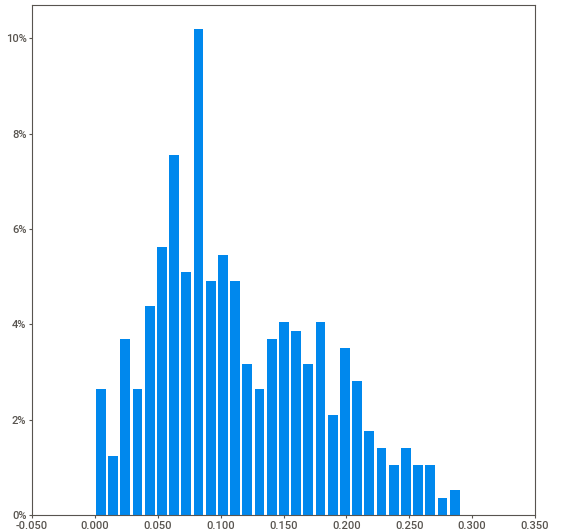
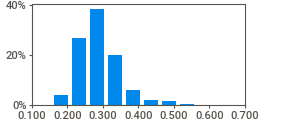
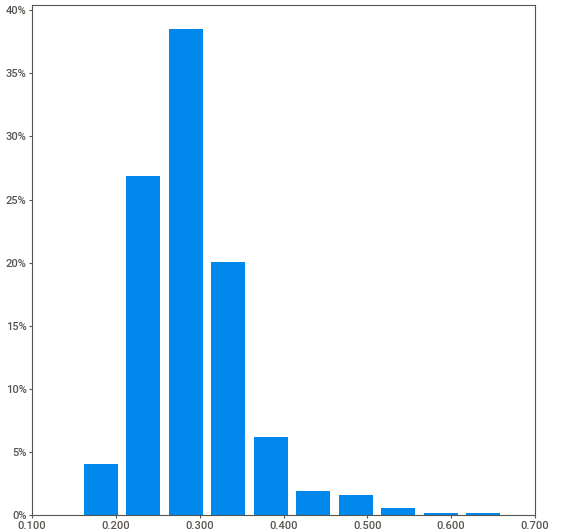
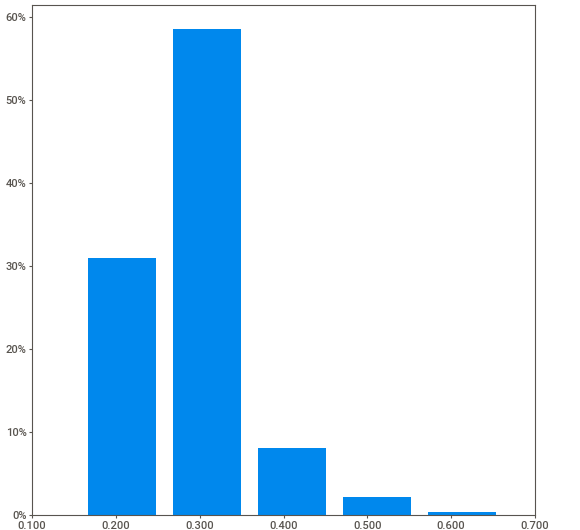
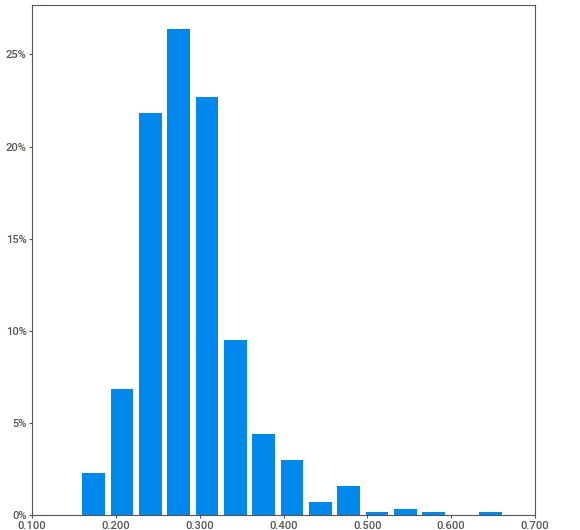
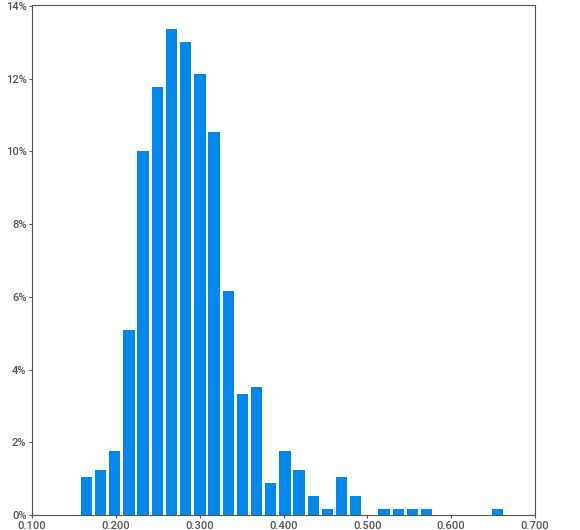
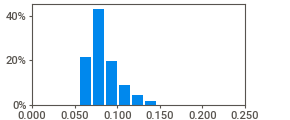
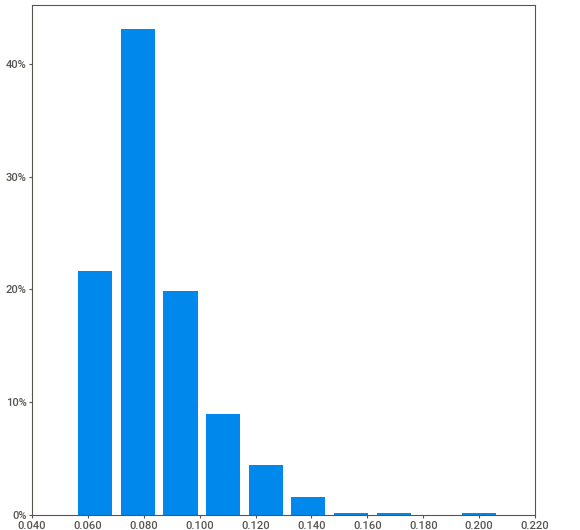
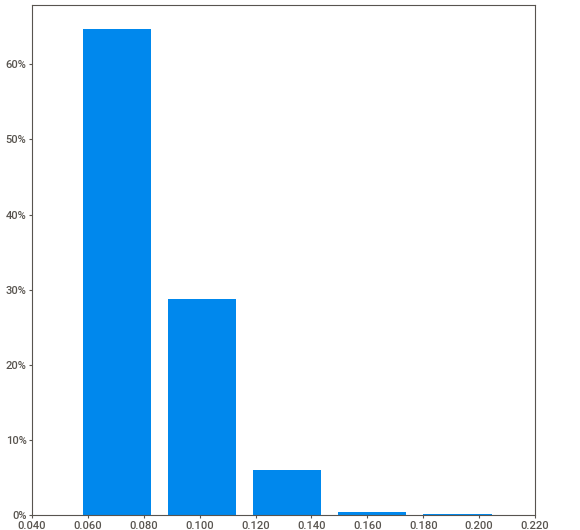
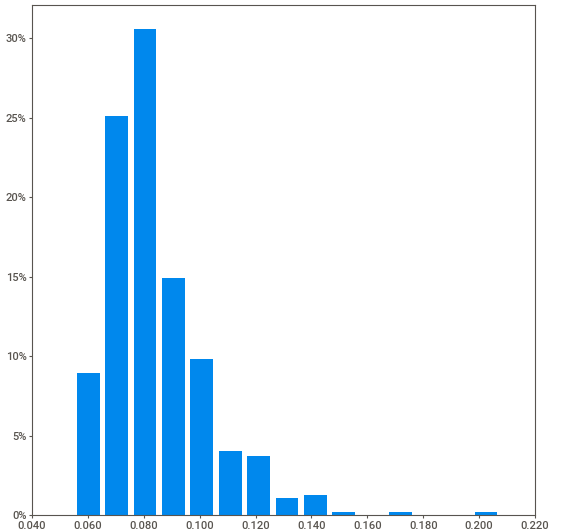
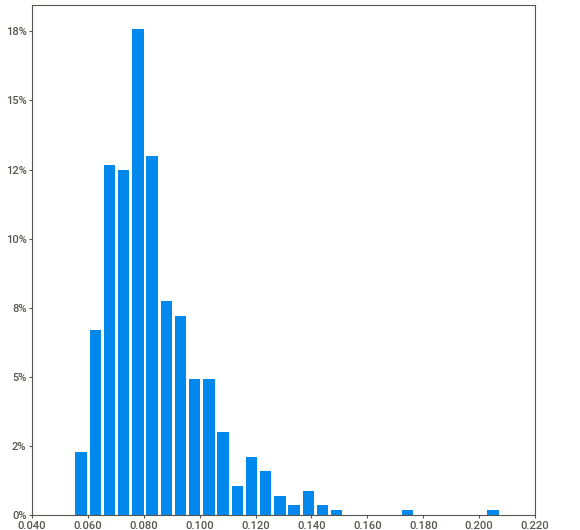
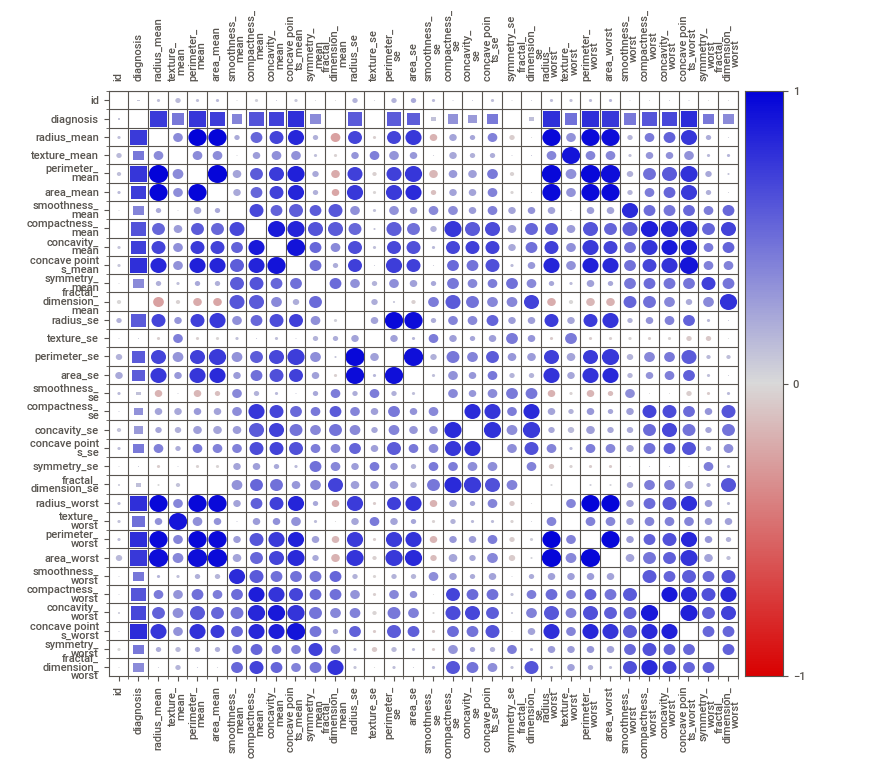
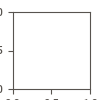

In [24]:
my_report = sv.analyze(df)
my_report.show_notebook()

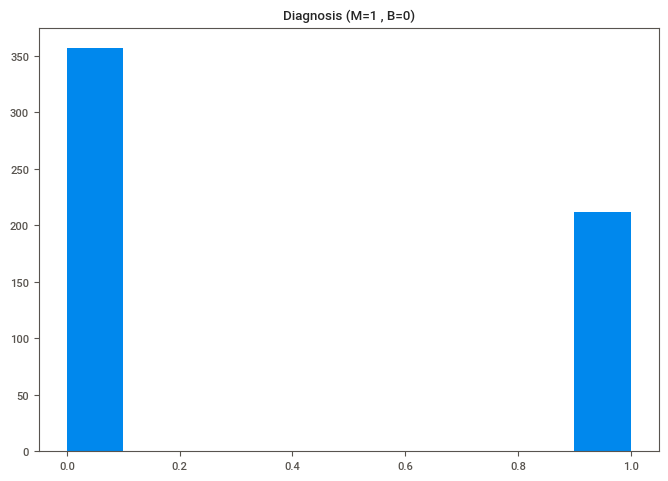

In [34]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

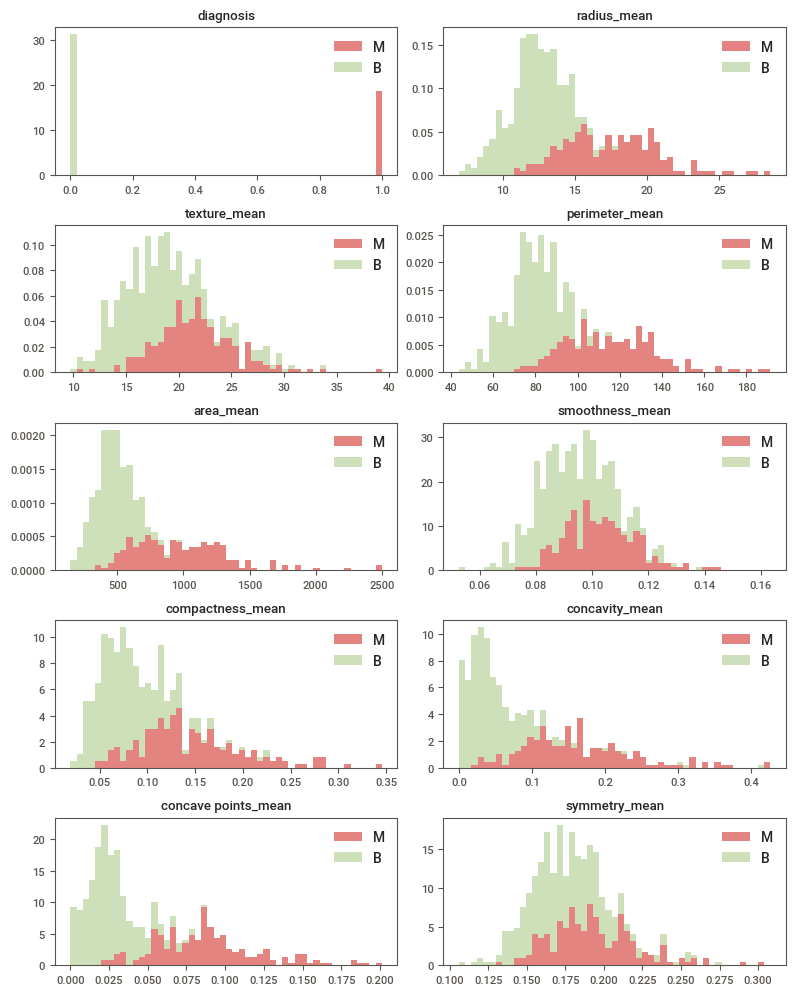

In [36]:
features_mean = list(df.columns[1:11])
dfM = df[df['diagnosis'] == 1]
dfB = df[df['diagnosis'] == 0]
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()

for idx, ax in enumerate(axes):
    binwidth = (max(df[features_mean[idx]]) - min(df[features_mean[idx]])) / 50
    ax.hist(
        [dfM[features_mean[idx]], dfB[features_mean[idx]]],
        bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth),
        alpha=0.5,
        stacked=True,
        density=True,  # Use density instead of normed (deprecated)
        label=['M', 'B'],
        color=['r', 'g']
    )
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])

plt.tight_layout()
plt.show()


<AxesSubplot: >

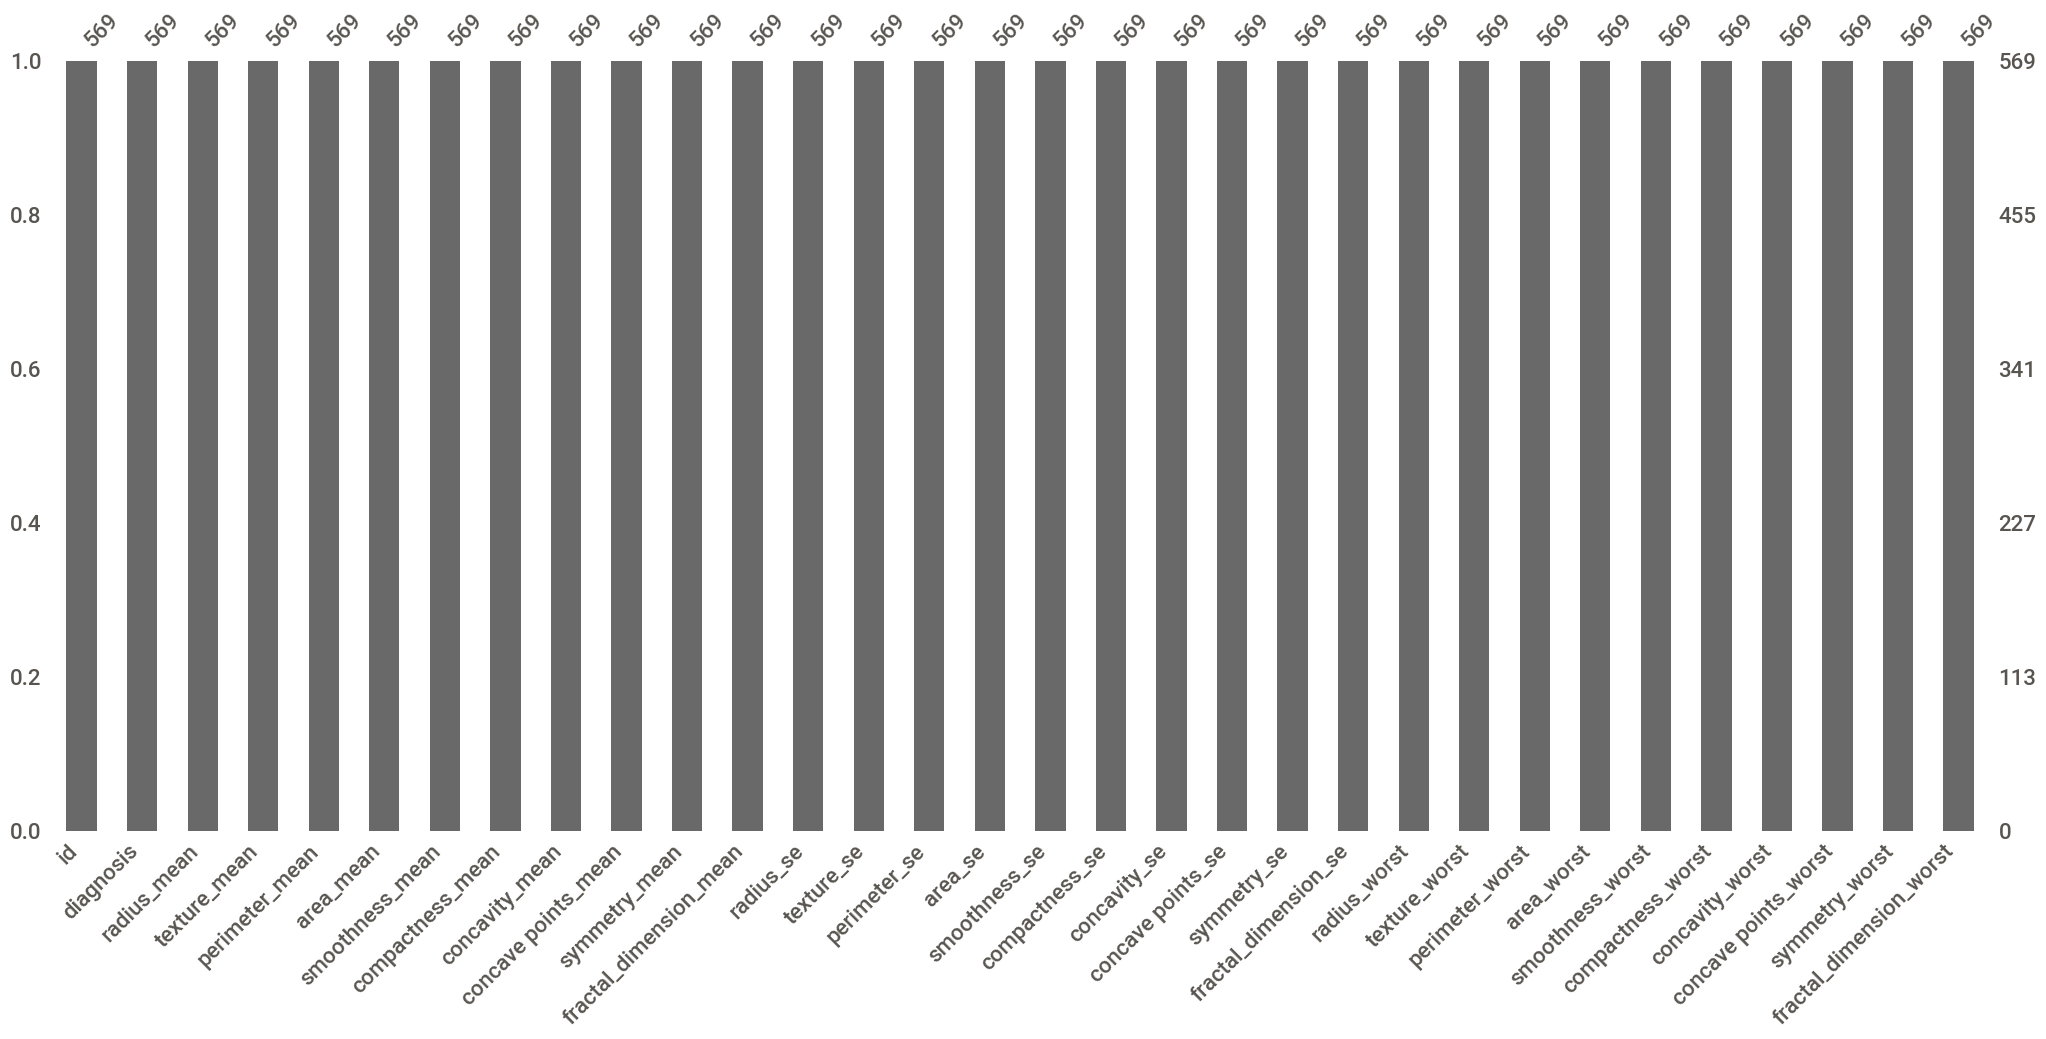

In [39]:
msno.bar(df)

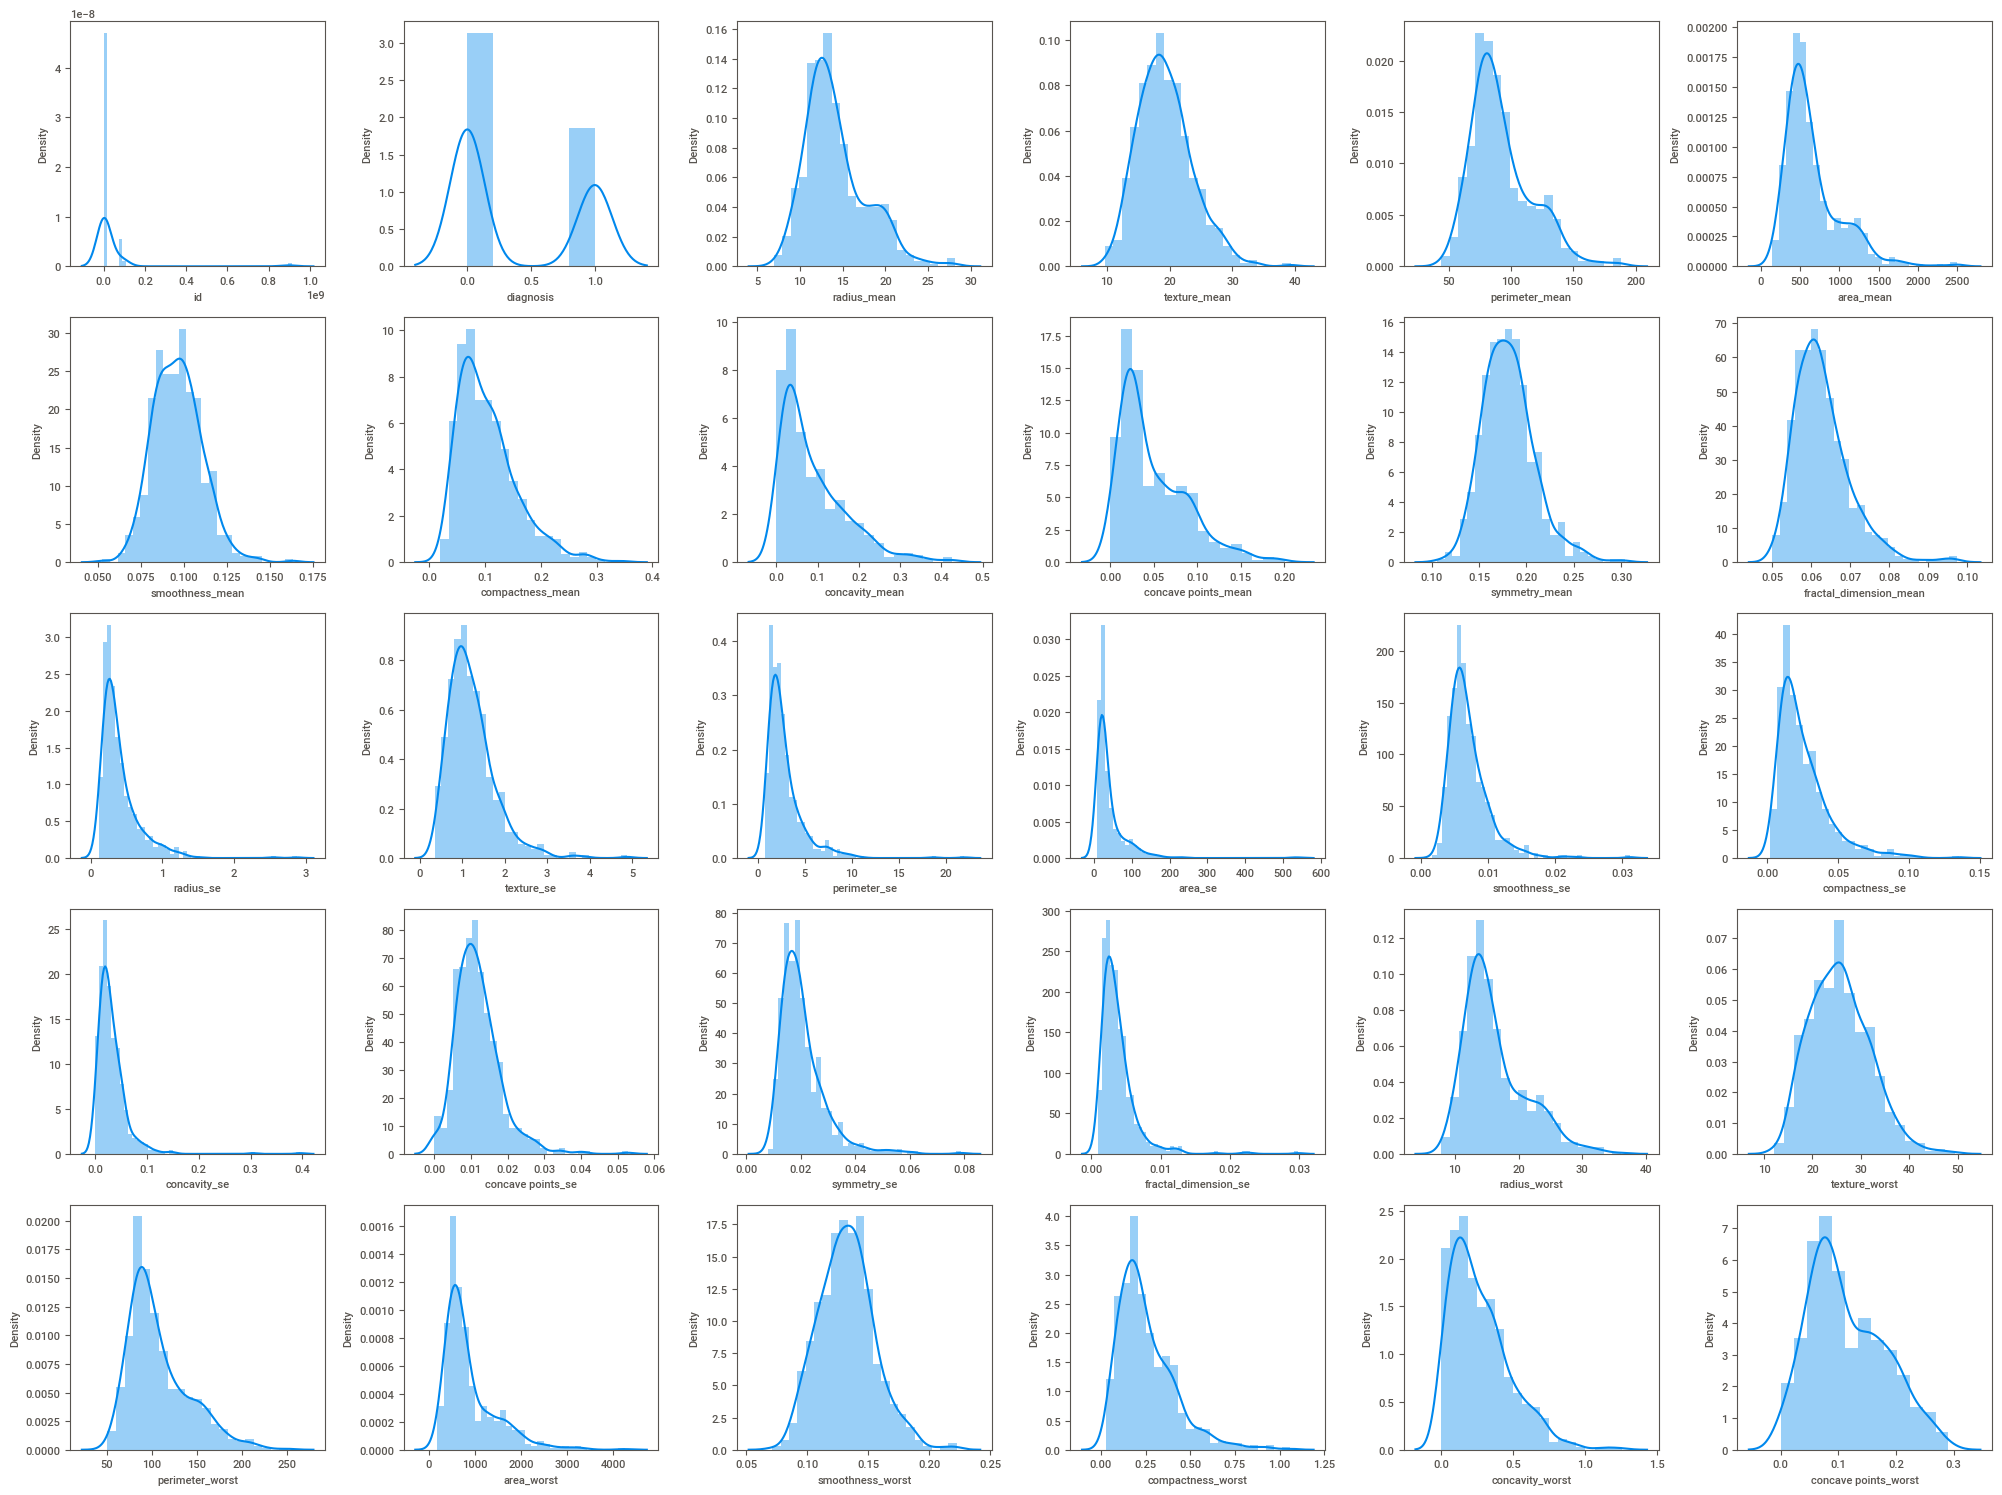

In [41]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

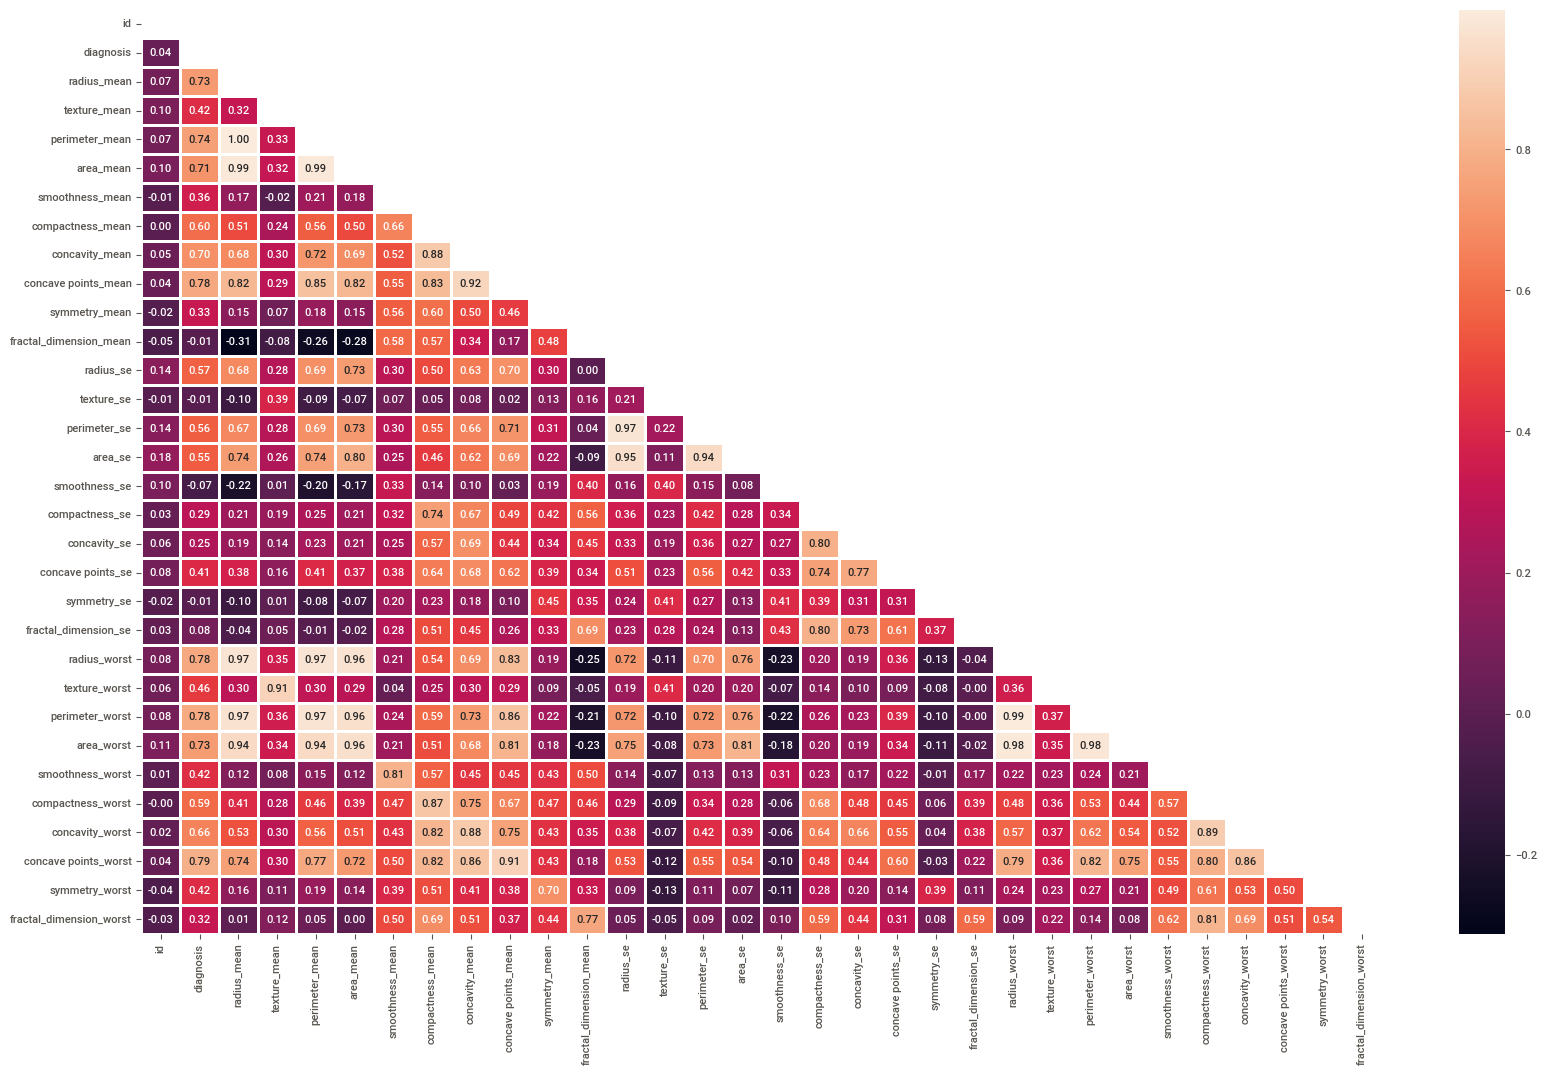

In [42]:
plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

# Machine Learning Part

In [43]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [44]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9899497487437185
0.9649122807017544
[[105   3]
 [  3  60]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9723618090452262
0.9590643274853801
[[107   1]
 [  6  57]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [52]:
svc = SVC()
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [53]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [54]:
grid_search.best_score_

0.9824999999999999

In [55]:
svc = SVC(C = 10, gamma = 0.01)
svc.fit(X_train, y_train)


SVC(C=10, gamma=0.01)

In [56]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9874371859296482
0.9883040935672515
[[107   1]
 [  1  62]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [57]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}

grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [58]:
grid_search.best_params_

{'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}

In [60]:
sgd = SGDClassifier(alpha = 0.001, loss = 'hinge', penalty = 'l2')
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.001)

In [61]:
y_pred = sgd.predict(X_test)
print(accuracy_score(y_train, sgd.predict(X_train)))
sgd_acc = accuracy_score(y_test, sgd.predict(X_test))
print(sgd_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9899497487437185
0.9298245614035088
[[101   7]
 [  5  58]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       108
           1       0.89      0.92      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [62]:
dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [63]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 29,
 'min_samples_leaf': 9,
 'min_samples_split': 8,
 'splitter': 'random'}

In [64]:
grid_search_dt.best_score_

0.9622468354430378

In [65]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 28, min_samples_leaf = 1, min_samples_split = 8, splitter = 'random')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=8,
                       splitter='random')

In [66]:
y_pred = dtc.predict(X_test)
print(accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9748743718592965
0.9590643274853801
[[105   3]
 [  4  59]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [69]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9949748743718593
0.9766081871345029
[[106   2]
 [  2  61]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [70]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Logistic Regression', log_reg), ('K Nearest Neighbours', knn), ('Support Vector Classifier', svc),
               ('Decision Tree', dtc)]

vc = VotingClassifier(estimators = classifiers)

vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

print(accuracy_score(y_train, vc.predict(X_train)))

vc_acc = accuracy_score(y_test, y_pred)
print(vc_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9874371859296482
0.9766081871345029
[[108   0]
 [  4  59]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       108
           1       1.00      0.94      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [71]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

ada = AdaBoostClassifier(dtc, n_estimators = 180)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(accuracy_score(y_train, ada.predict(X_train)))

ada_acc = accuracy_score(y_test, y_pred)
print(ada_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.9707602339181286
[[106   2]
 [  3  60]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [72]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)
print(grid_search_gbc.best_params_)
print(grid_search_gbc.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 150}
0.9648417721518987


In [73]:
gbc = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 200)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.9707602339181286
[[106   2]
 [  3  60]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [74]:
sgbc = GradientBoostingClassifier(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=200, random_state=0)

sgbc.fit(X_train, y_train)
y_pred = sgbc.predict(X_test)
print(accuracy_score(y_train, sgbc.predict(X_train)))

sgbc_acc = accuracy_score(y_test, y_pred)
print(sgbc_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.9590643274853801
[[105   3]
 [  4  59]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [75]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 180)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.9649122807017544
[[106   2]
 [  4  59]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [76]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC', 'SGD Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Voting Classifier', 'Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost'],
    'Score': [log_reg_acc, knn_acc, svc_acc, sgd_acc, dtc_acc, ran_clf_acc, vc_acc, ada_acc, gbc_acc, sgbc_acc, xgb_acc]
})

models.sort_values(by = 'Score', ascending = False)

Model  Score
2                            SVC   0.99
5       Random Forest Classifier   0.98
6              Voting Classifier   0.98
7           Ada Boost Classifier   0.97
8   Gradient Boosting Classifier   0.97
0            Logistic Regression   0.96
10                       XgBoost   0.96
1                            KNN   0.96
4       Decision Tree Classifier   0.96
9   Stochastic Gradient Boosting   0.96
3                 SGD Classifier   0.93